In [1]:
import os
import random
import torch
import numpy as np
from torchvision import models
from torch import nn, optim
from torch.optim import lr_scheduler
from torchsummary import summary

from vgg_our import VGG_OUR
from data_loading import Data
from model_training import train_model, plot_training_history
from model_testing import test_model, plot_examples

In [ ]:
random_seed = 42 # 24, 62
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
data_dir = 'C:/Users/weron/Pulpit/sem1/dl/proj1/archive'

In [5]:
data = Data(data_dir)

# VGG Our


In [6]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [7]:
model = VGG_OUR(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [8]:
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,928
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
         MaxPool2d-7           [-1, 64, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]          73,856
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,584
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
        MaxPool2d-14            [-1, 12

In [9]:
sample_input = torch.randn(1, 3, 32, 32).to(device)
model.eval()
with torch.no_grad():
    output = model(sample_input)
print(output.shape)

torch.Size([1, 10])


In [10]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.4186 Acc: 0.4797
valid Loss: 1.1935 Acc: 0.5575

Epoch 1/19
----------
train Loss: 1.0693 Acc: 0.6178
valid Loss: 1.0283 Acc: 0.6335

Epoch 2/19
----------
train Loss: 0.9271 Acc: 0.6724
valid Loss: 0.9235 Acc: 0.6693

Epoch 3/19
----------
train Loss: 0.8323 Acc: 0.7035
valid Loss: 0.8842 Acc: 0.6858

Epoch 4/19
----------
train Loss: 0.7588 Acc: 0.7323
valid Loss: 0.7997 Acc: 0.7129

Epoch 5/19
----------
train Loss: 0.6933 Acc: 0.7562
valid Loss: 0.7526 Acc: 0.7327

Epoch 6/19
----------
train Loss: 0.6445 Acc: 0.7729
valid Loss: 0.7820 Acc: 0.7278

Epoch 7/19
----------
train Loss: 0.4798 Acc: 0.8339
valid Loss: 0.6630 Acc: 0.7690

Epoch 8/19
----------
train Loss: 0.4263 Acc: 0.8535
valid Loss: 0.6646 Acc: 0.7698

Epoch 9/19
----------
train Loss: 0.3973 Acc: 0.8636
valid Loss: 0.6678 Acc: 0.7700

Epoch 10/19
----------
train Loss: 0.3725 Acc: 0.8724
valid Loss: 0.6847 Acc: 0.7696

Epoch 11/19
----------
train Loss: 0.3434 Acc: 0.8829
valid Loss

In [11]:
title = 'VGG_OUR'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

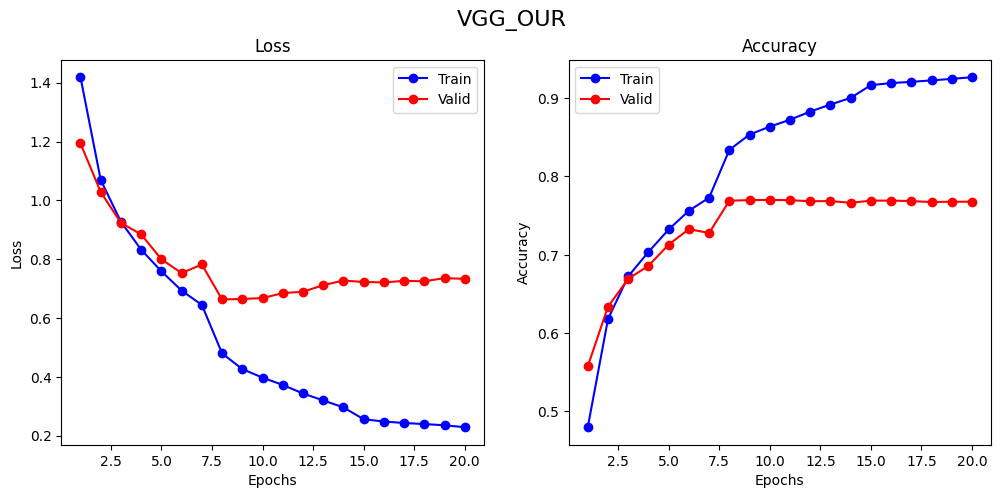

In [12]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [13]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7684

Classification Report:
              precision    recall  f1-score   support

    airplane       0.85      0.85      0.85      9000
  automobile       0.77      0.84      0.81      9000
        bird       0.75      0.74      0.75      9000
         cat       0.65      0.67      0.66      9000
        deer       0.72      0.71      0.71      9000
         dog       0.63      0.61      0.62      9000
        frog       0.86      0.85      0.85      9000
       horse       0.82      0.82      0.82      9000
        ship       0.82      0.84      0.83      9000
       truck       0.82      0.75      0.79      9000

    accuracy                           0.77     90000
   macro avg       0.77      0.77      0.77     90000
weighted avg       0.77      0.77      0.77     90000



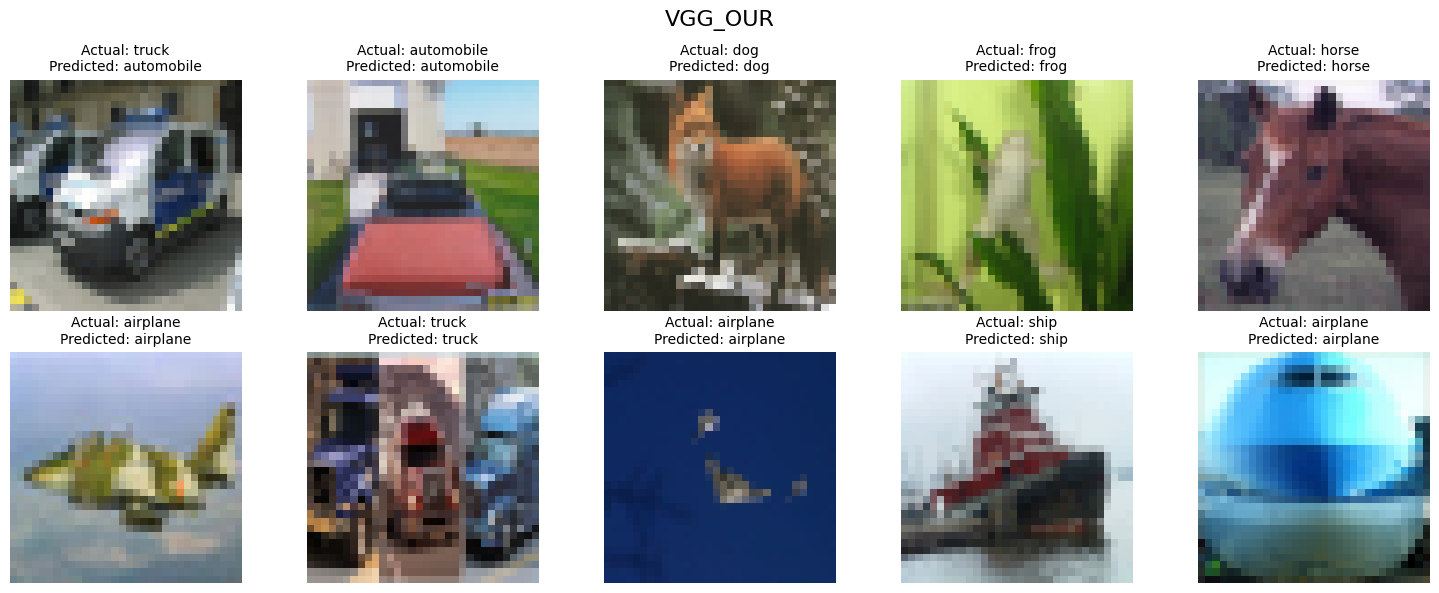

In [14]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

## Adam


### VGG Our Adam


In [15]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [16]:
model = VGG_OUR(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [17]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.5813 Acc: 0.3943
valid Loss: 1.4374 Acc: 0.4805

Epoch 1/19
----------
train Loss: 1.2483 Acc: 0.5485
valid Loss: 1.1277 Acc: 0.5932

Epoch 2/19
----------
train Loss: 1.1055 Acc: 0.6032
valid Loss: 1.0344 Acc: 0.6297

Epoch 3/19
----------
train Loss: 0.9899 Acc: 0.6498
valid Loss: 0.9653 Acc: 0.6531

Epoch 4/19
----------
train Loss: 0.8949 Acc: 0.6847
valid Loss: 0.8621 Acc: 0.6975

Epoch 5/19
----------
train Loss: 0.8217 Acc: 0.7109
valid Loss: 0.8197 Acc: 0.7115

Epoch 6/19
----------
train Loss: 0.7567 Acc: 0.7356
valid Loss: 0.7794 Acc: 0.7206

Epoch 7/19
----------
train Loss: 0.6019 Acc: 0.7876
valid Loss: 0.6700 Acc: 0.7633

Epoch 8/19
----------
train Loss: 0.5681 Acc: 0.7999
valid Loss: 0.6641 Acc: 0.7663

Epoch 9/19
----------
train Loss: 0.5453 Acc: 0.8083
valid Loss: 0.6588 Acc: 0.7701

Epoch 10/19
----------
train Loss: 0.5274 Acc: 0.8139
valid Loss: 0.6587 Acc: 0.7702

Epoch 11/19
----------
train Loss: 0.5129 Acc: 0.8187
valid Loss

In [18]:
title = 'VGG_OUR_Adam'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

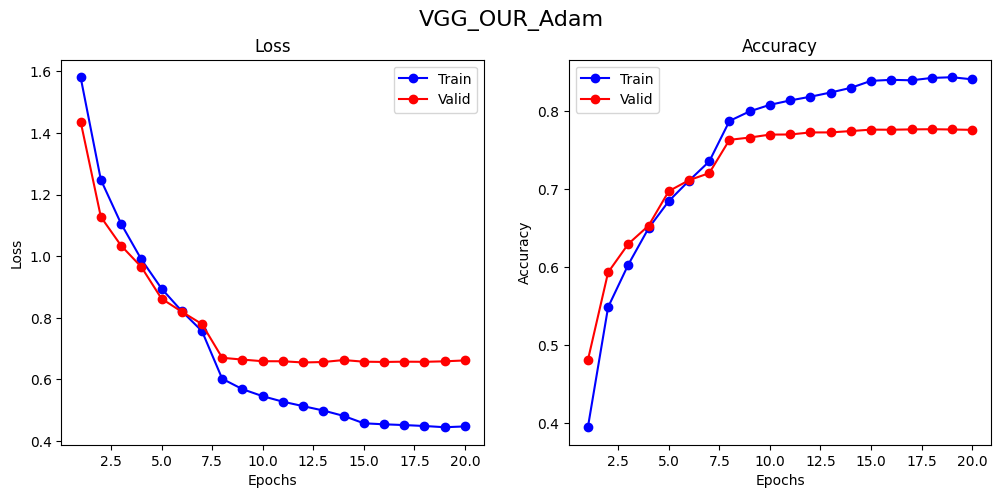

In [19]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [20]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7727

Classification Report:
              precision    recall  f1-score   support

    airplane       0.85      0.86      0.85      9000
  automobile       0.81      0.81      0.81      9000
        bird       0.75      0.75      0.75      9000
         cat       0.66      0.66      0.66      9000
        deer       0.72      0.71      0.72      9000
         dog       0.63      0.62      0.63      9000
        frog       0.86      0.87      0.86      9000
       horse       0.80      0.82      0.81      9000
        ship       0.84      0.84      0.84      9000
       truck       0.80      0.78      0.79      9000

    accuracy                           0.77     90000
   macro avg       0.77      0.77      0.77     90000
weighted avg       0.77      0.77      0.77     90000



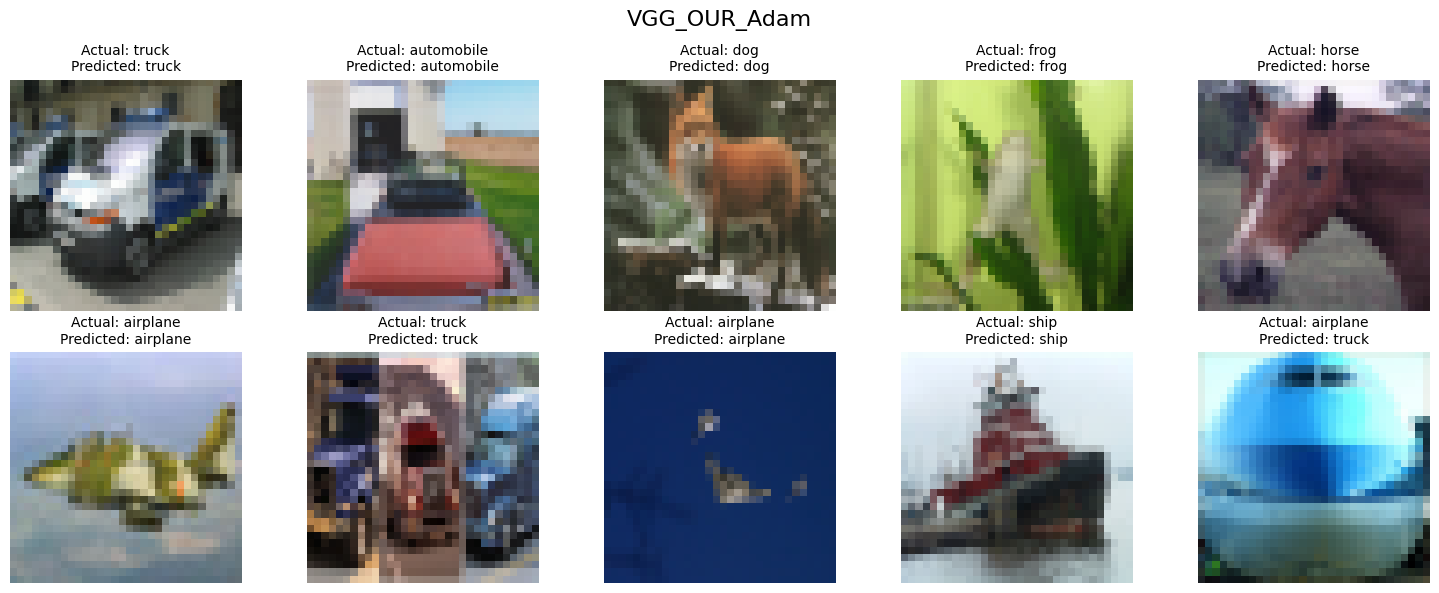

In [21]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG Our ADAM wd = 0.001


In [22]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [23]:
model = VGG_OUR(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [24]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.7306 Acc: 0.3185
valid Loss: 1.6044 Acc: 0.3850

Epoch 1/19
----------
train Loss: 1.4338 Acc: 0.4541
valid Loss: 1.3007 Acc: 0.5163

Epoch 2/19
----------
train Loss: 1.2845 Acc: 0.5286
valid Loss: 1.1950 Acc: 0.5623

Epoch 3/19
----------
train Loss: 1.1939 Acc: 0.5699
valid Loss: 1.1401 Acc: 0.5812

Epoch 4/19
----------
train Loss: 1.1328 Acc: 0.5947
valid Loss: 1.1303 Acc: 0.5935

Epoch 5/19
----------
train Loss: 1.0878 Acc: 0.6113
valid Loss: 1.0530 Acc: 0.6243

Epoch 6/19
----------
train Loss: 1.0569 Acc: 0.6245
valid Loss: 1.0249 Acc: 0.6297

Epoch 7/19
----------
train Loss: 0.9091 Acc: 0.6799
valid Loss: 0.8611 Acc: 0.6896

Epoch 8/19
----------
train Loss: 0.8710 Acc: 0.6937
valid Loss: 0.8406 Acc: 0.6982

Epoch 9/19
----------
train Loss: 0.8499 Acc: 0.7007
valid Loss: 0.8356 Acc: 0.7018

Epoch 10/19
----------
train Loss: 0.8284 Acc: 0.7089
valid Loss: 0.8183 Acc: 0.7094

Epoch 11/19
----------
train Loss: 0.8170 Acc: 0.7117
valid Loss

In [25]:
title = 'VGG_OUR_Adam_WG0001'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

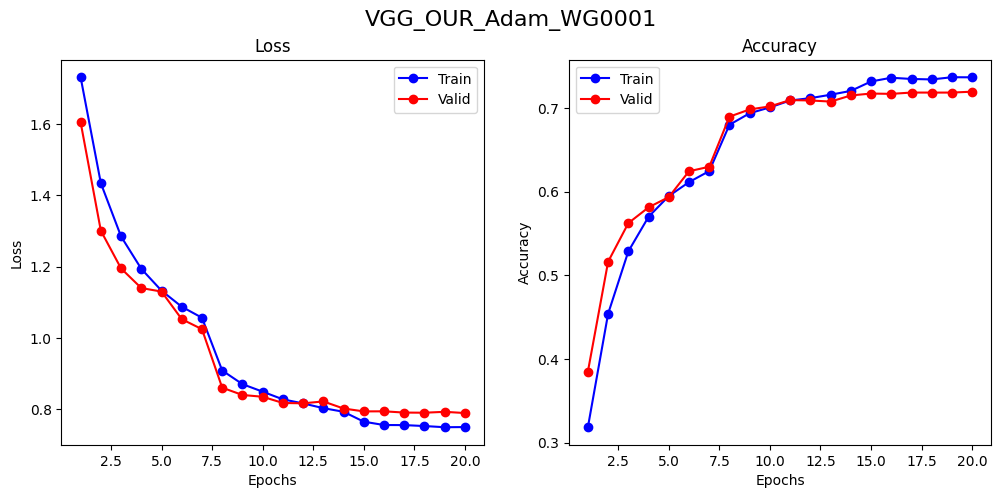

In [26]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [27]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7177

Classification Report:
              precision    recall  f1-score   support

    airplane       0.80      0.82      0.81      9000
  automobile       0.79      0.74      0.77      9000
        bird       0.68      0.68      0.68      9000
         cat       0.58      0.60      0.59      9000
        deer       0.68      0.63      0.65      9000
         dog       0.57      0.52      0.54      9000
        frog       0.82      0.81      0.81      9000
       horse       0.75      0.78      0.77      9000
        ship       0.77      0.81      0.79      9000
       truck       0.73      0.77      0.75      9000

    accuracy                           0.72     90000
   macro avg       0.72      0.72      0.72     90000
weighted avg       0.72      0.72      0.72     90000



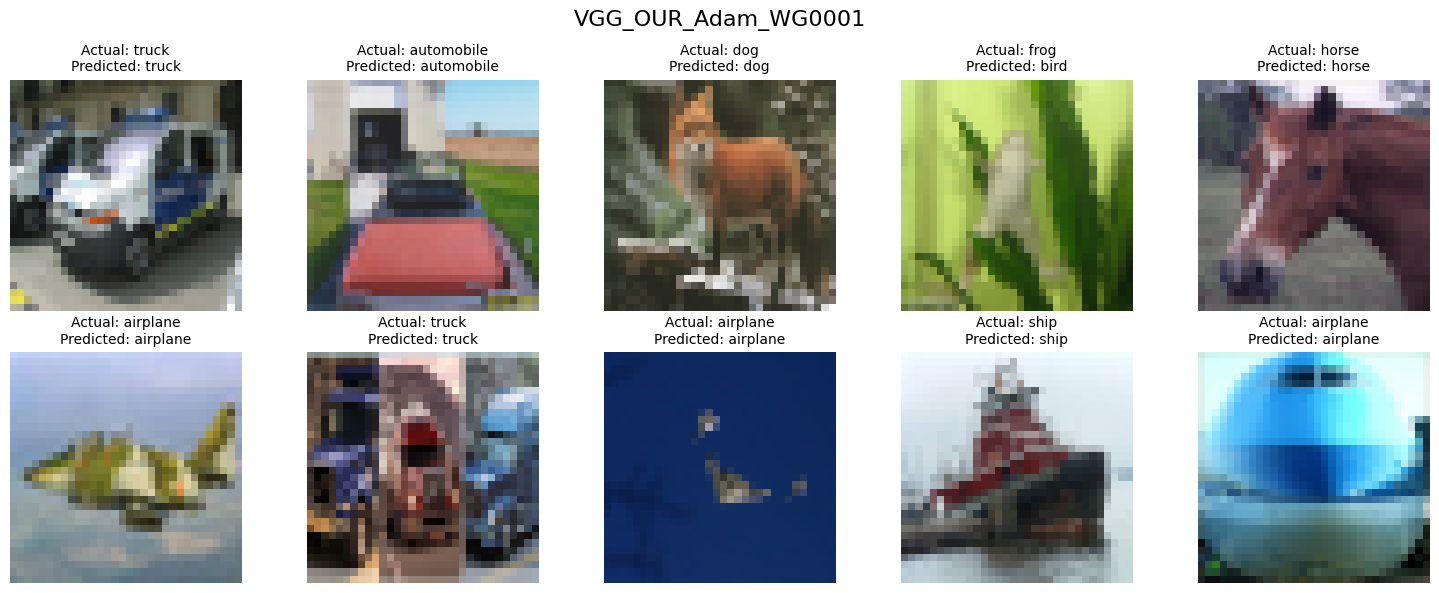

In [28]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG Our ADAM wd = 0.01


In [29]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [30]:
model = VGG_OUR(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [31]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.9302 Acc: 0.2371
valid Loss: 1.9089 Acc: 0.2295

Epoch 1/19
----------
train Loss: 1.7270 Acc: 0.3130
valid Loss: 1.6242 Acc: 0.3411

Epoch 2/19
----------
train Loss: 1.6396 Acc: 0.3477
valid Loss: 1.6513 Acc: 0.3444

Epoch 3/19
----------
train Loss: 1.6026 Acc: 0.3611
valid Loss: 1.5954 Acc: 0.3585

Epoch 4/19
----------
train Loss: 1.5703 Acc: 0.3818
valid Loss: 1.5198 Acc: 0.4006

Epoch 5/19
----------
train Loss: 1.5375 Acc: 0.4011
valid Loss: 1.5464 Acc: 0.4024

Epoch 6/19
----------
train Loss: 1.5053 Acc: 0.4181
valid Loss: 1.6592 Acc: 0.3568

Epoch 7/19
----------
train Loss: 1.4089 Acc: 0.4554
valid Loss: 1.3479 Acc: 0.4808

Epoch 8/19
----------
train Loss: 1.3908 Acc: 0.4663
valid Loss: 1.3350 Acc: 0.4795

Epoch 9/19
----------
train Loss: 1.3805 Acc: 0.4680
valid Loss: 1.3299 Acc: 0.4867

Epoch 10/19
----------
train Loss: 1.3711 Acc: 0.4726
valid Loss: 1.3409 Acc: 0.4820

Epoch 11/19
----------
train Loss: 1.3668 Acc: 0.4754
valid Loss

In [32]:
title = 'VGG_OUR_Adam_WG001'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

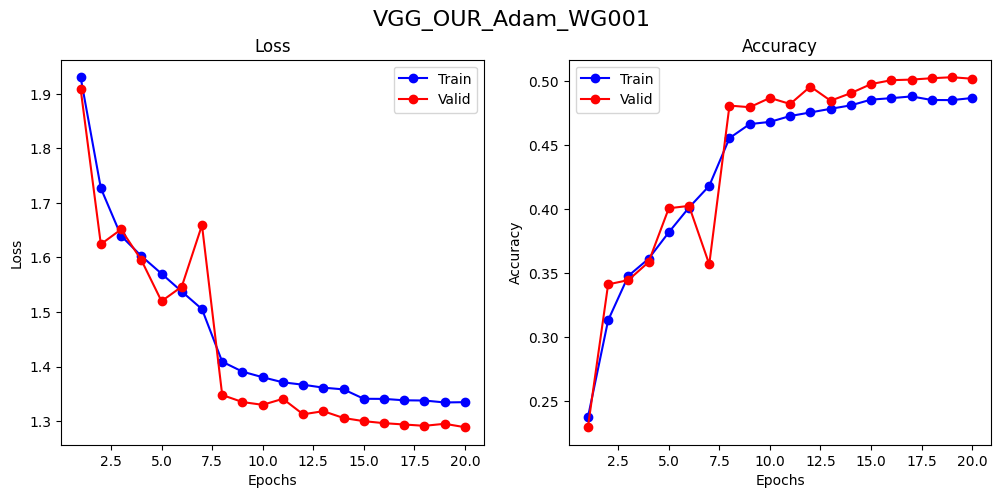

In [33]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [34]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.5011

Classification Report:
              precision    recall  f1-score   support

    airplane       0.66      0.68      0.67      9000
  automobile       0.51      0.60      0.55      9000
        bird       0.39      0.43      0.41      9000
         cat       0.34      0.32      0.33      9000
        deer       0.39      0.35      0.37      9000
         dog       0.34      0.29      0.31      9000
        frog       0.58      0.74      0.65      9000
       horse       0.61      0.65      0.63      9000
        ship       0.60      0.65      0.63      9000
       truck       0.50      0.30      0.37      9000

    accuracy                           0.50     90000
   macro avg       0.49      0.50      0.49     90000
weighted avg       0.49      0.50      0.49     90000



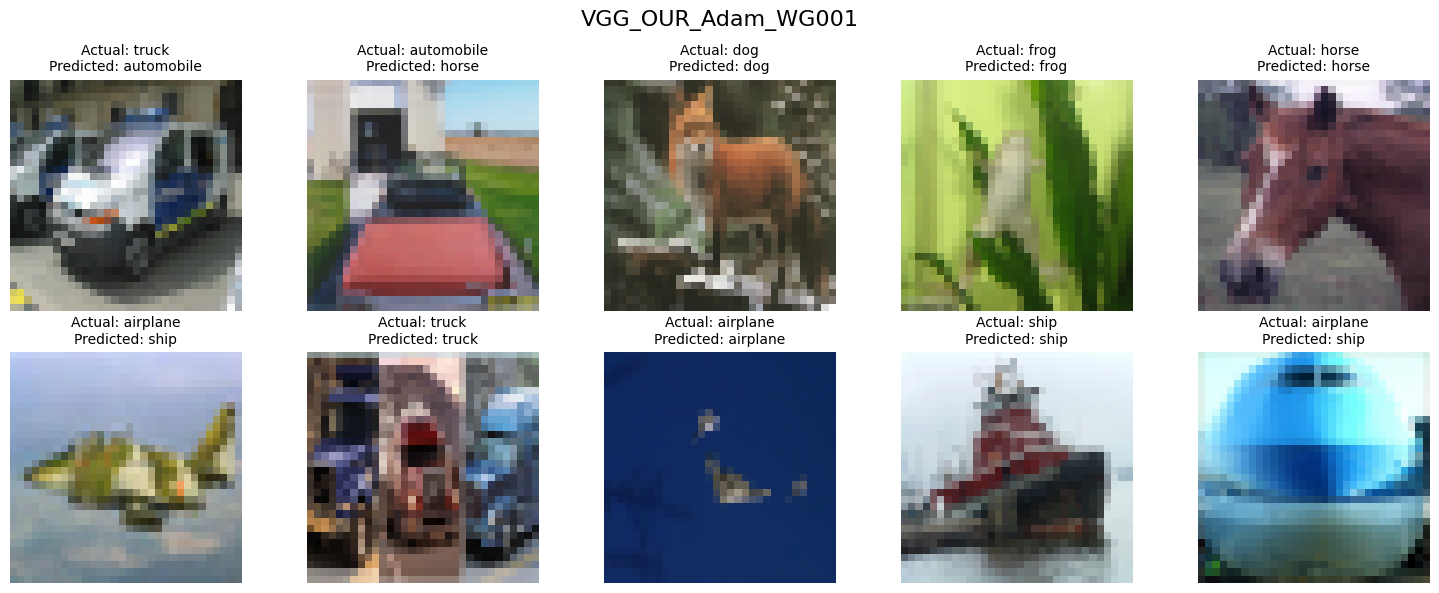

In [35]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

## Weight decay


### VGG Our SGD wd = 0.001


In [36]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [37]:
model = VGG_OUR(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.001)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [38]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.4282 Acc: 0.4758
valid Loss: 1.3131 Acc: 0.5344

Epoch 1/19
----------
train Loss: 1.0701 Acc: 0.6175
valid Loss: 0.9620 Acc: 0.6556

Epoch 2/19
----------
train Loss: 0.9292 Acc: 0.6701
valid Loss: 0.8868 Acc: 0.6823

Epoch 3/19
----------
train Loss: 0.8336 Acc: 0.7060
valid Loss: 0.8524 Acc: 0.6953

Epoch 4/19
----------
train Loss: 0.7617 Acc: 0.7319
valid Loss: 0.7809 Acc: 0.7223

Epoch 5/19
----------
train Loss: 0.7079 Acc: 0.7500
valid Loss: 0.7893 Acc: 0.7252

Epoch 6/19
----------
train Loss: 0.6556 Acc: 0.7691
valid Loss: 0.7506 Acc: 0.7366

Epoch 7/19
----------
train Loss: 0.4870 Acc: 0.8324
valid Loss: 0.6399 Acc: 0.7747

Epoch 8/19
----------
train Loss: 0.4391 Acc: 0.8495
valid Loss: 0.6412 Acc: 0.7777

Epoch 9/19
----------
train Loss: 0.4042 Acc: 0.8622
valid Loss: 0.6411 Acc: 0.7779

Epoch 10/19
----------
train Loss: 0.3773 Acc: 0.8699
valid Loss: 0.6484 Acc: 0.7766

Epoch 11/19
----------
train Loss: 0.3497 Acc: 0.8810
valid Loss

In [39]:
title = 'VGG_OUR_SGD_WD0001'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

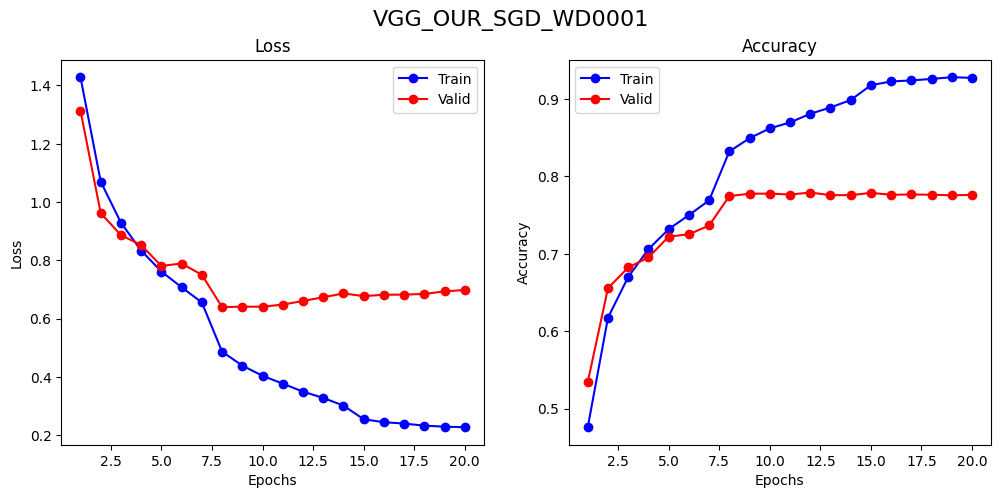

In [40]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [41]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7738

Classification Report:
              precision    recall  f1-score   support

    airplane       0.83      0.86      0.85      9000
  automobile       0.80      0.82      0.81      9000
        bird       0.76      0.75      0.75      9000
         cat       0.66      0.67      0.66      9000
        deer       0.71      0.73      0.72      9000
         dog       0.65      0.61      0.63      9000
        frog       0.86      0.86      0.86      9000
       horse       0.80      0.84      0.82      9000
        ship       0.83      0.83      0.83      9000
       truck       0.82      0.77      0.79      9000

    accuracy                           0.77     90000
   macro avg       0.77      0.77      0.77     90000
weighted avg       0.77      0.77      0.77     90000



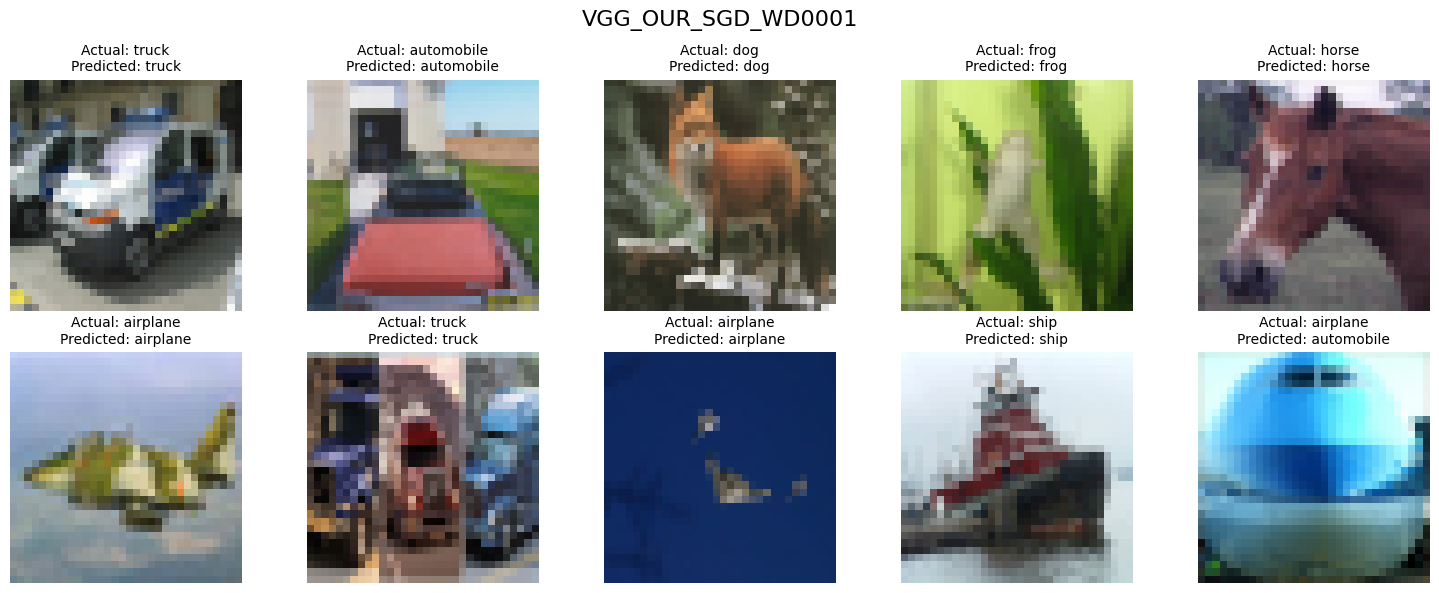

In [42]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG Our SGD wd = 0.01


In [43]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [44]:
model = VGG_OUR(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [45]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.4389 Acc: 0.4727
valid Loss: 1.3174 Acc: 0.5319

Epoch 1/19
----------
train Loss: 1.1076 Acc: 0.6055
valid Loss: 0.9922 Acc: 0.6500

Epoch 2/19
----------
train Loss: 0.9941 Acc: 0.6536
valid Loss: 0.9805 Acc: 0.6545

Epoch 3/19
----------
train Loss: 0.9248 Acc: 0.6810
valid Loss: 0.9226 Acc: 0.6747

Epoch 4/19
----------
train Loss: 0.8791 Acc: 0.6978
valid Loss: 0.8650 Acc: 0.7001

Epoch 5/19
----------
train Loss: 0.8450 Acc: 0.7119
valid Loss: 0.9060 Acc: 0.6873

Epoch 6/19
----------
train Loss: 0.8139 Acc: 0.7232
valid Loss: 0.7989 Acc: 0.7238

Epoch 7/19
----------
train Loss: 0.6233 Acc: 0.7972
valid Loss: 0.6280 Acc: 0.7852

Epoch 8/19
----------
train Loss: 0.5620 Acc: 0.8190
valid Loss: 0.6152 Acc: 0.7893

Epoch 9/19
----------
train Loss: 0.5186 Acc: 0.8340
valid Loss: 0.6010 Acc: 0.7937

Epoch 10/19
----------
train Loss: 0.4832 Acc: 0.8459
valid Loss: 0.6015 Acc: 0.7937

Epoch 11/19
----------
train Loss: 0.4534 Acc: 0.8567
valid Loss

In [46]:
title = 'VGG_OUR_SGD_WD001'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

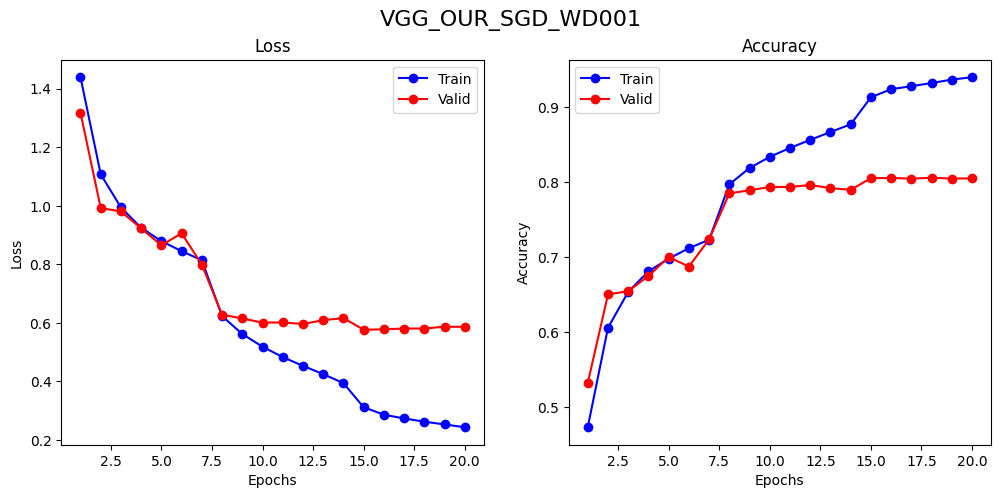

In [47]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [48]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.8013

Classification Report:
              precision    recall  f1-score   support

    airplane       0.87      0.88      0.87      9000
  automobile       0.84      0.81      0.83      9000
        bird       0.81      0.78      0.79      9000
         cat       0.71      0.70      0.70      9000
        deer       0.76      0.75      0.75      9000
         dog       0.65      0.68      0.67      9000
        frog       0.88      0.89      0.88      9000
       horse       0.83      0.85      0.84      9000
        ship       0.85      0.87      0.86      9000
       truck       0.81      0.82      0.81      9000

    accuracy                           0.80     90000
   macro avg       0.80      0.80      0.80     90000
weighted avg       0.80      0.80      0.80     90000



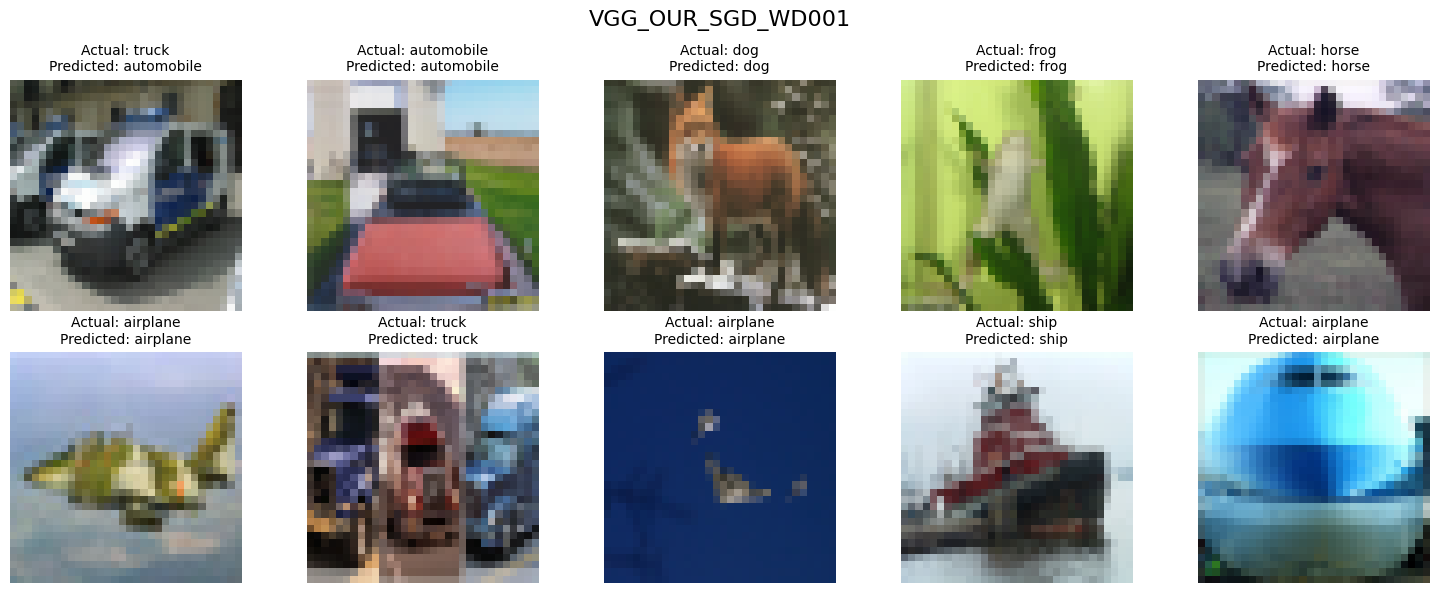

In [49]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG Our SGD wd = 0.1


In [50]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [51]:
model = VGG_OUR(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.1)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [52]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.7890 Acc: 0.3412
valid Loss: 1.8639 Acc: 0.3368

Epoch 1/19
----------
train Loss: 1.9115 Acc: 0.3351
valid Loss: 1.9621 Acc: 0.3262

Epoch 2/19
----------
train Loss: 1.9927 Acc: 0.2882
valid Loss: 2.0448 Acc: 0.2557

Epoch 3/19
----------
train Loss: 2.0341 Acc: 0.2555
valid Loss: 2.0554 Acc: 0.2555

Epoch 4/19
----------
train Loss: 2.0418 Acc: 0.2559
valid Loss: 2.0844 Acc: 0.2549

Epoch 5/19
----------
train Loss: 2.0452 Acc: 0.2537
valid Loss: 2.0515 Acc: 0.2659

Epoch 6/19
----------
train Loss: 2.0444 Acc: 0.2540
valid Loss: 2.0635 Acc: 0.2558

Epoch 7/19
----------
train Loss: 2.0120 Acc: 0.2695
valid Loss: 1.9750 Acc: 0.2713

Epoch 8/19
----------
train Loss: 1.9883 Acc: 0.2714
valid Loss: 1.9683 Acc: 0.2749

Epoch 9/19
----------
train Loss: 1.9731 Acc: 0.2724
valid Loss: 1.9663 Acc: 0.2732

Epoch 10/19
----------
train Loss: 1.9636 Acc: 0.2723
valid Loss: 1.9443 Acc: 0.2761

Epoch 11/19
----------
train Loss: 1.9557 Acc: 0.2733
valid Loss

In [53]:
title = 'VGG_OUR_SGD_WD01'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

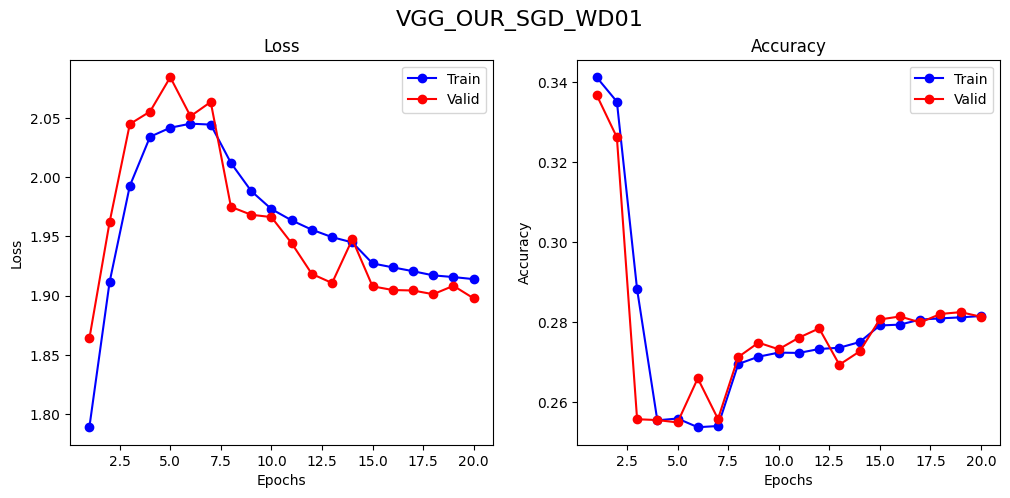

In [54]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [55]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.3355

Classification Report:
              precision    recall  f1-score   support

    airplane       0.37      0.87      0.52      9000
  automobile       0.48      0.69      0.56      9000
        bird       0.22      0.04      0.07      9000
         cat       0.00      0.00      0.00      9000
        deer       0.14      0.02      0.03      9000
         dog       0.22      0.02      0.03      9000
        frog       0.26      0.95      0.41      9000
       horse       0.36      0.76      0.49      9000
        ship       0.18      0.01      0.01      9000
       truck       0.00      0.00      0.00      9000

    accuracy                           0.34     90000
   macro avg       0.22      0.34      0.21     90000
weighted avg       0.22      0.34      0.21     90000



C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\weron\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

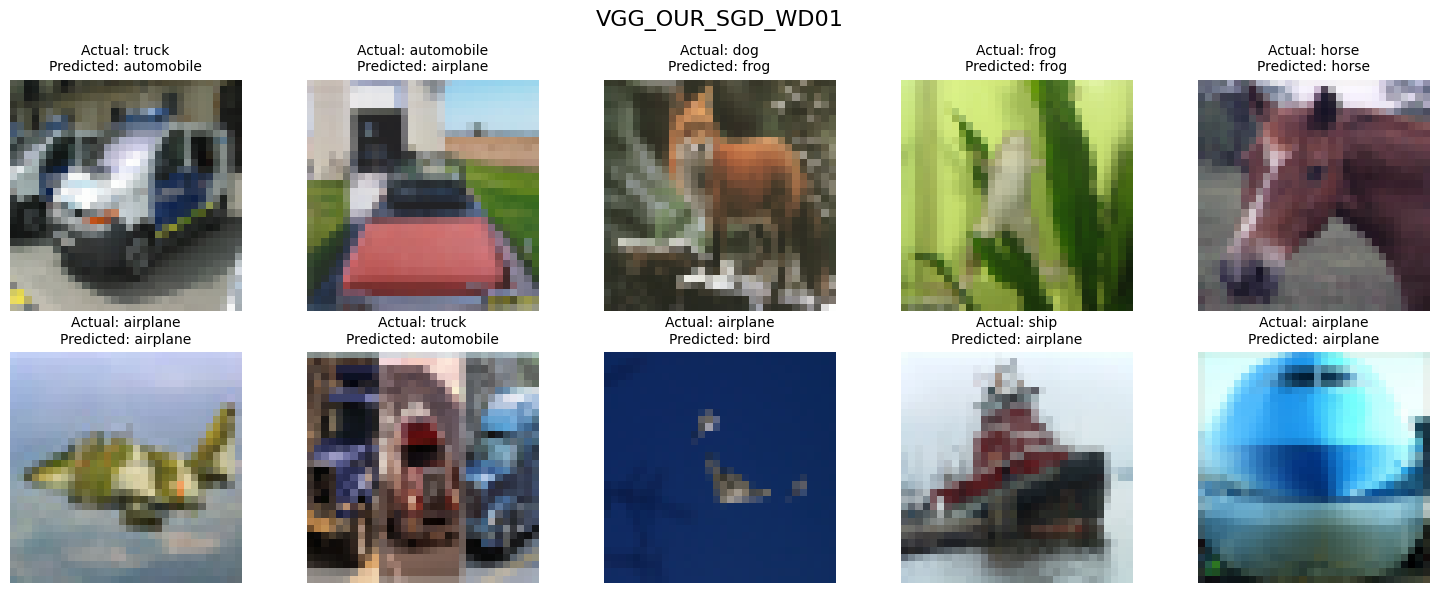

In [56]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

## Learning rate


### VGG Our SGD lr = 0.01


In [57]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [58]:
model = VGG_OUR(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [59]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.4410 Acc: 0.4698
valid Loss: 1.2526 Acc: 0.5569

Epoch 1/19
----------
train Loss: 1.1076 Acc: 0.6064
valid Loss: 0.9862 Acc: 0.6515

Epoch 2/19
----------
train Loss: 0.9635 Acc: 0.6585
valid Loss: 0.8871 Acc: 0.6853

Epoch 3/19
----------
train Loss: 0.8571 Acc: 0.6979
valid Loss: 0.8664 Acc: 0.6937

Epoch 4/19
----------
train Loss: 0.7806 Acc: 0.7257
valid Loss: 0.7743 Acc: 0.7273

Epoch 5/19
----------
train Loss: 0.7210 Acc: 0.7472
valid Loss: 0.7880 Acc: 0.7283

Epoch 6/19
----------
train Loss: 0.6662 Acc: 0.7660
valid Loss: 0.7228 Acc: 0.7440

Epoch 7/19
----------
train Loss: 0.4993 Acc: 0.8246
valid Loss: 0.6254 Acc: 0.7817

Epoch 8/19
----------
train Loss: 0.4589 Acc: 0.8388
valid Loss: 0.6250 Acc: 0.7851

Epoch 9/19
----------
train Loss: 0.4331 Acc: 0.8471
valid Loss: 0.6188 Acc: 0.7868

Epoch 10/19
----------
train Loss: 0.4109 Acc: 0.8542
valid Loss: 0.6255 Acc: 0.7872

Epoch 11/19
----------
train Loss: 0.3896 Acc: 0.8622
valid Loss

In [60]:
title = 'VGG_OUR_SGD_LR001'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

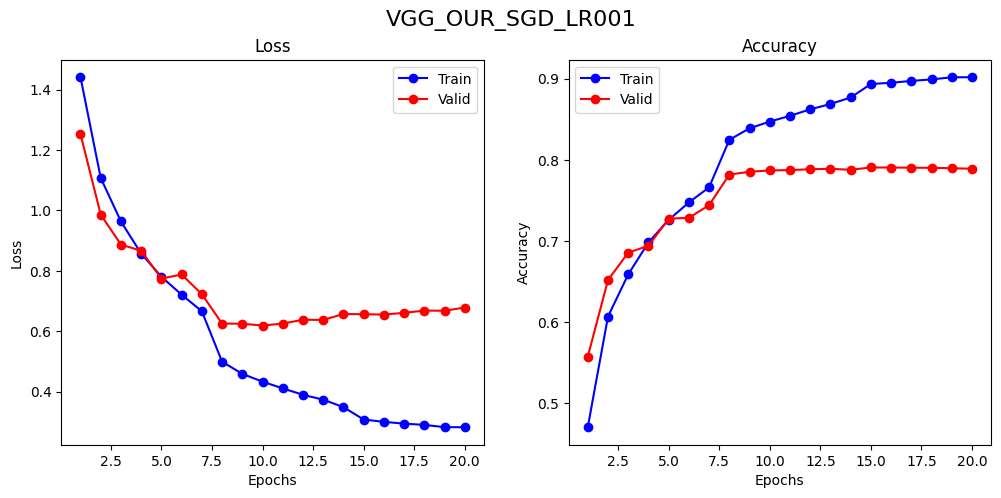

In [61]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [62]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7837

Classification Report:
              precision    recall  f1-score   support

    airplane       0.87      0.86      0.86      9000
  automobile       0.81      0.82      0.82      9000
        bird       0.76      0.76      0.76      9000
         cat       0.65      0.70      0.68      9000
        deer       0.75      0.73      0.74      9000
         dog       0.65      0.63      0.64      9000
        frog       0.86      0.87      0.87      9000
       horse       0.84      0.83      0.83      9000
        ship       0.84      0.85      0.85      9000
       truck       0.81      0.79      0.80      9000

    accuracy                           0.78     90000
   macro avg       0.78      0.78      0.78     90000
weighted avg       0.78      0.78      0.78     90000



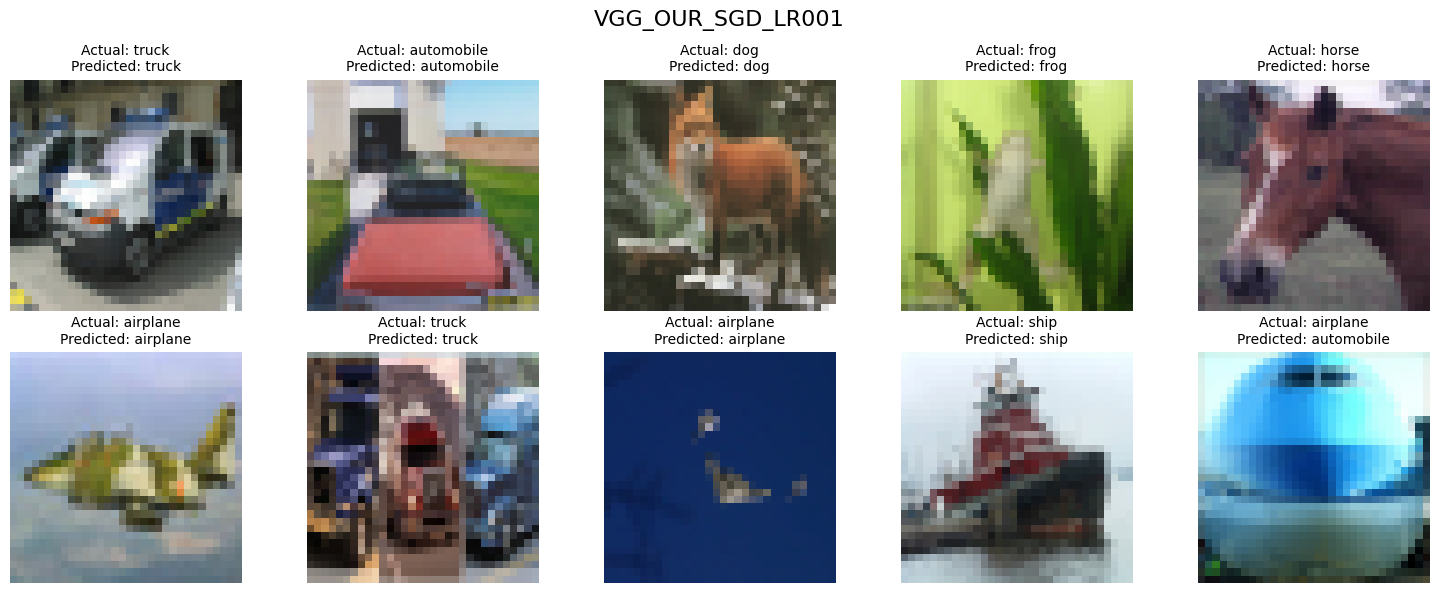

In [63]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG Our SGD lr = 0.1


In [64]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [65]:
model = VGG_OUR(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [66]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.9024 Acc: 0.2489
valid Loss: 1.6512 Acc: 0.3446

Epoch 1/19
----------
train Loss: 1.5874 Acc: 0.4004
valid Loss: 1.4639 Acc: 0.4590

Epoch 2/19
----------
train Loss: 1.3769 Acc: 0.5059
valid Loss: 1.2406 Acc: 0.5551

Epoch 3/19
----------
train Loss: 1.2599 Acc: 0.5528
valid Loss: 1.1964 Acc: 0.5751

Epoch 4/19
----------
train Loss: 1.1757 Acc: 0.5850
valid Loss: 1.1461 Acc: 0.5917

Epoch 5/19
----------
train Loss: 1.1169 Acc: 0.6081
valid Loss: 1.0333 Acc: 0.6429

Epoch 6/19
----------
train Loss: 1.0425 Acc: 0.6347
valid Loss: 0.9974 Acc: 0.6448

Epoch 7/19
----------
train Loss: 0.8467 Acc: 0.7026
valid Loss: 0.8434 Acc: 0.7033

Epoch 8/19
----------
train Loss: 0.8028 Acc: 0.7183
valid Loss: 0.8202 Acc: 0.7100

Epoch 9/19
----------
train Loss: 0.7731 Acc: 0.7280
valid Loss: 0.8163 Acc: 0.7141

Epoch 10/19
----------
train Loss: 0.7488 Acc: 0.7367
valid Loss: 0.7881 Acc: 0.7229

Epoch 11/19
----------
train Loss: 0.7295 Acc: 0.7447
valid Loss

In [67]:
title = 'VGG_OUR_SGD_LR01'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

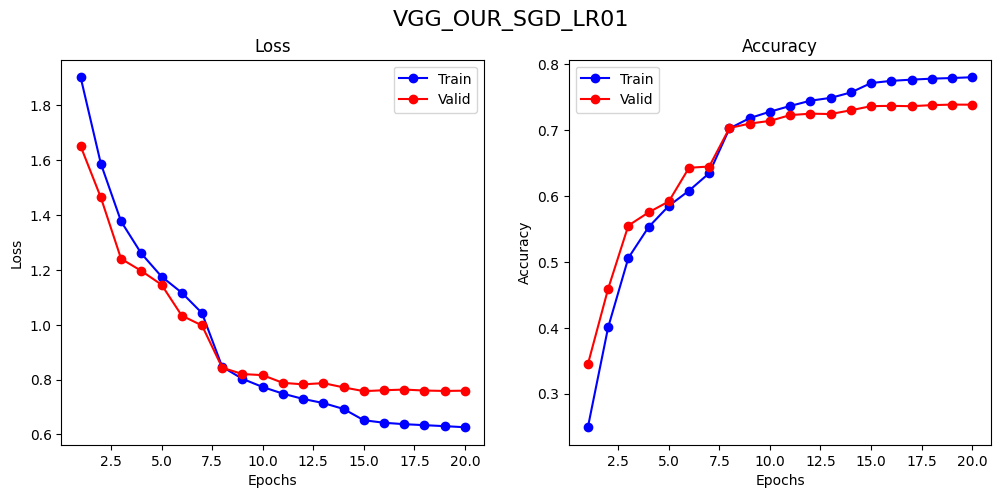

In [68]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [69]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7340

Classification Report:
              precision    recall  f1-score   support

    airplane       0.85      0.82      0.83      9000
  automobile       0.81      0.78      0.80      9000
        bird       0.69      0.70      0.70      9000
         cat       0.58      0.60      0.59      9000
        deer       0.65      0.69      0.67      9000
         dog       0.62      0.52      0.56      9000
        frog       0.78      0.83      0.81      9000
       horse       0.79      0.78      0.79      9000
        ship       0.79      0.84      0.81      9000
       truck       0.79      0.76      0.77      9000

    accuracy                           0.73     90000
   macro avg       0.73      0.73      0.73     90000
weighted avg       0.73      0.73      0.73     90000



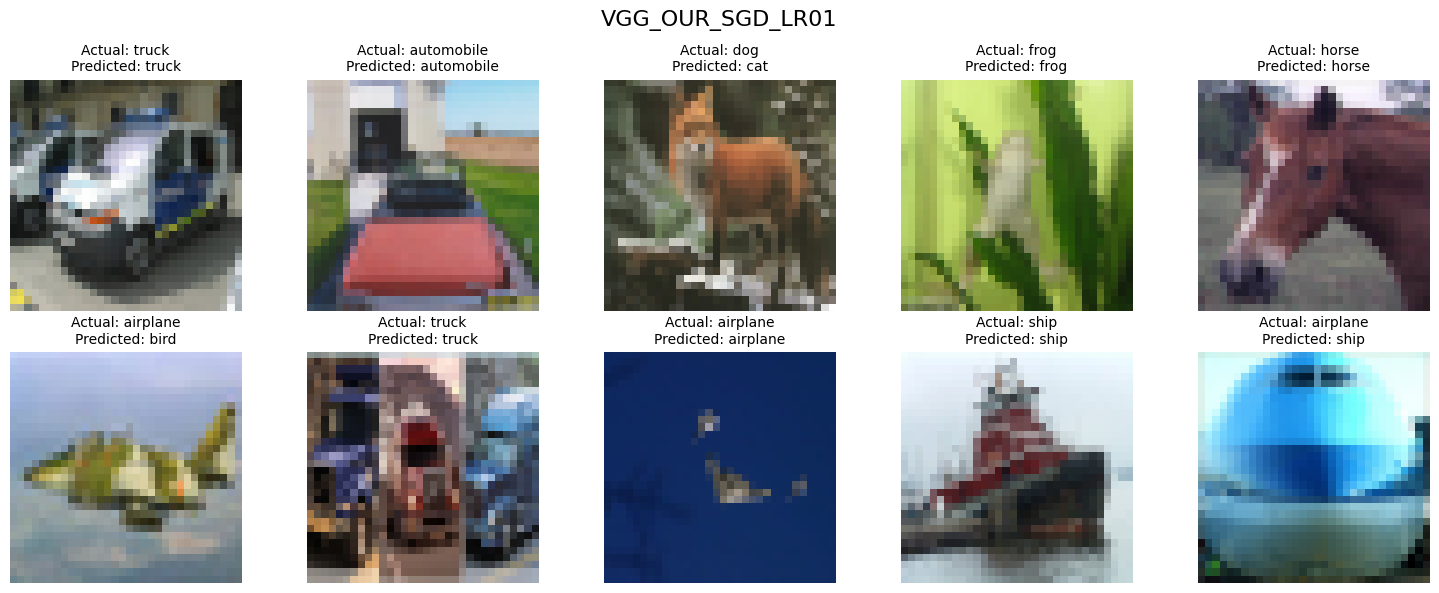

In [70]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

## Momentum


### VGG Our SGD momentum = 0


In [71]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [72]:
model = VGG_OUR(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [73]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.9029 Acc: 0.2936
valid Loss: 1.6229 Acc: 0.3936

Epoch 1/19
----------
train Loss: 1.4915 Acc: 0.4505
valid Loss: 1.3471 Acc: 0.5076

Epoch 2/19
----------
train Loss: 1.3080 Acc: 0.5231
valid Loss: 1.2692 Acc: 0.5328

Epoch 3/19
----------
train Loss: 1.1970 Acc: 0.5642
valid Loss: 1.1732 Acc: 0.5709

Epoch 4/19
----------
train Loss: 1.1124 Acc: 0.5980
valid Loss: 1.1193 Acc: 0.5921

Epoch 5/19
----------
train Loss: 1.0414 Acc: 0.6238
valid Loss: 1.0951 Acc: 0.6154

Epoch 6/19
----------
train Loss: 0.9801 Acc: 0.6501
valid Loss: 1.0353 Acc: 0.6337

Epoch 7/19
----------
train Loss: 0.8807 Acc: 0.6890
valid Loss: 0.9116 Acc: 0.6730

Epoch 8/19
----------
train Loss: 0.8634 Acc: 0.6962
valid Loss: 0.9095 Acc: 0.6739

Epoch 9/19
----------
train Loss: 0.8494 Acc: 0.7006
valid Loss: 0.9017 Acc: 0.6763

Epoch 10/19
----------
train Loss: 0.8374 Acc: 0.7047
valid Loss: 0.9011 Acc: 0.6777

Epoch 11/19
----------
train Loss: 0.8270 Acc: 0.7094
valid Loss

In [74]:
title = 'VGG_OUR_SGD_M0'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

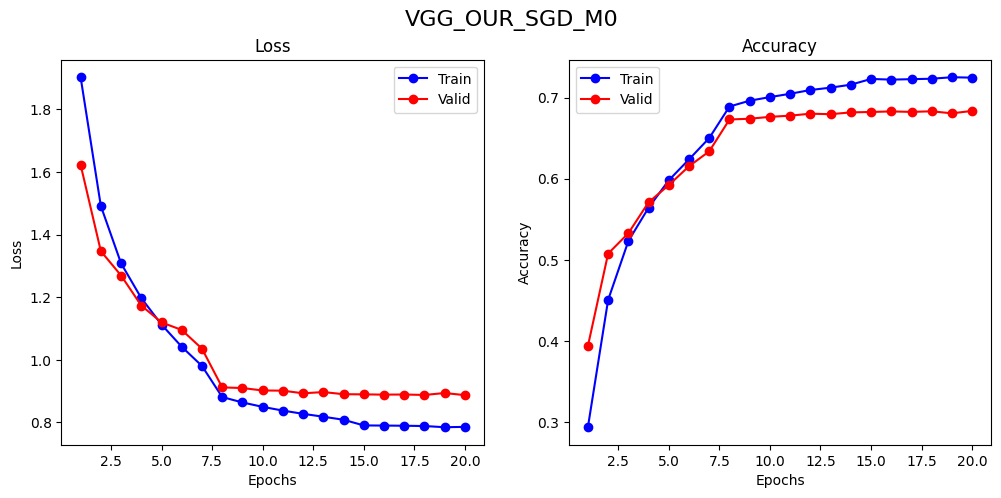

In [75]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [76]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.6802

Classification Report:
              precision    recall  f1-score   support

    airplane       0.76      0.79      0.78      9000
  automobile       0.76      0.73      0.74      9000
        bird       0.63      0.64      0.63      9000
         cat       0.53      0.54      0.53      9000
        deer       0.61      0.58      0.59      9000
         dog       0.53      0.47      0.50      9000
        frog       0.76      0.79      0.78      9000
       horse       0.74      0.73      0.74      9000
        ship       0.74      0.78      0.76      9000
       truck       0.72      0.75      0.73      9000

    accuracy                           0.68     90000
   macro avg       0.68      0.68      0.68     90000
weighted avg       0.68      0.68      0.68     90000



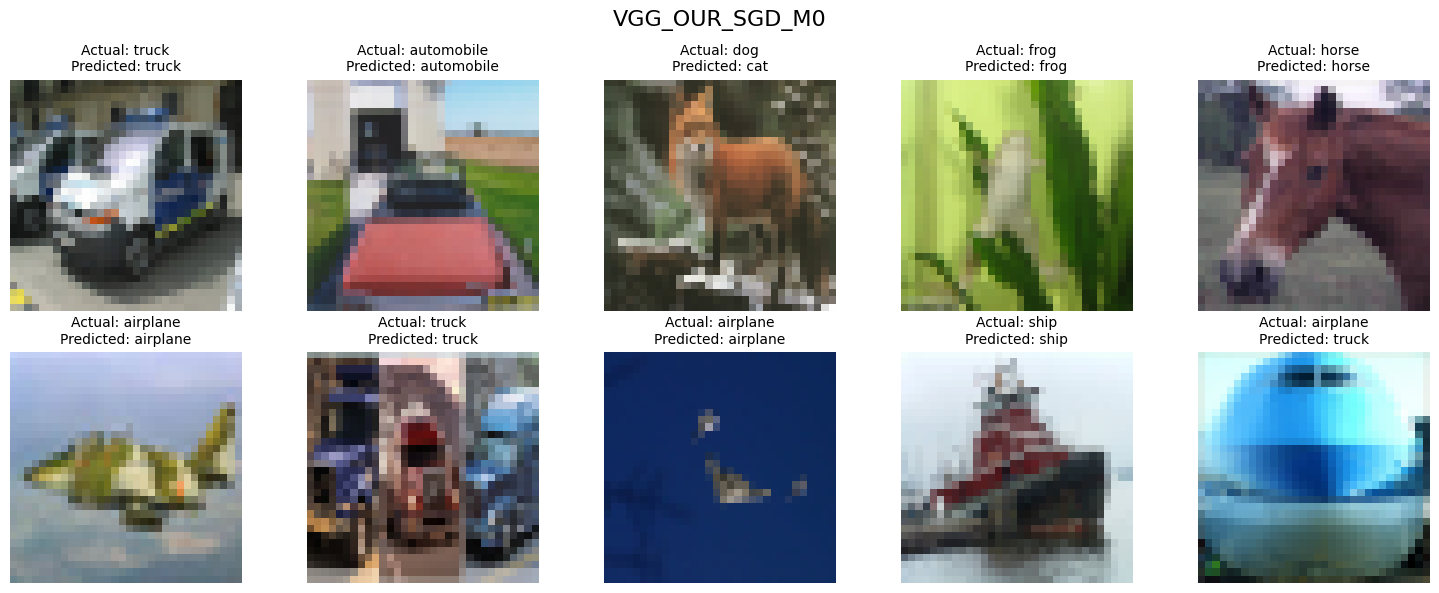

In [77]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG Our SGD momentum = 0.5


In [78]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [79]:
model = VGG_OUR(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.5)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [80]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.7158 Acc: 0.3647
valid Loss: 1.5007 Acc: 0.4453

Epoch 1/19
----------
train Loss: 1.2997 Acc: 0.5271
valid Loss: 1.2015 Acc: 0.5587

Epoch 2/19
----------
train Loss: 1.1406 Acc: 0.5865
valid Loss: 1.0960 Acc: 0.6017

Epoch 3/19
----------
train Loss: 1.0335 Acc: 0.6301
valid Loss: 0.9947 Acc: 0.6423

Epoch 4/19
----------
train Loss: 0.9495 Acc: 0.6643
valid Loss: 1.0171 Acc: 0.6362

Epoch 5/19
----------
train Loss: 0.8819 Acc: 0.6868
valid Loss: 0.8974 Acc: 0.6790

Epoch 6/19
----------
train Loss: 0.8221 Acc: 0.7090
valid Loss: 0.9035 Acc: 0.6811

Epoch 7/19
----------
train Loss: 0.6882 Acc: 0.7612
valid Loss: 0.7930 Acc: 0.7184

Epoch 8/19
----------
train Loss: 0.6590 Acc: 0.7737
valid Loss: 0.7941 Acc: 0.7182

Epoch 9/19
----------
train Loss: 0.6361 Acc: 0.7803
valid Loss: 0.7918 Acc: 0.7191

Epoch 10/19
----------
train Loss: 0.6159 Acc: 0.7873
valid Loss: 0.7922 Acc: 0.7197

Epoch 11/19
----------
train Loss: 0.5996 Acc: 0.7944
valid Loss

In [81]:
title = 'VGG_OUR_SGD_M05'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

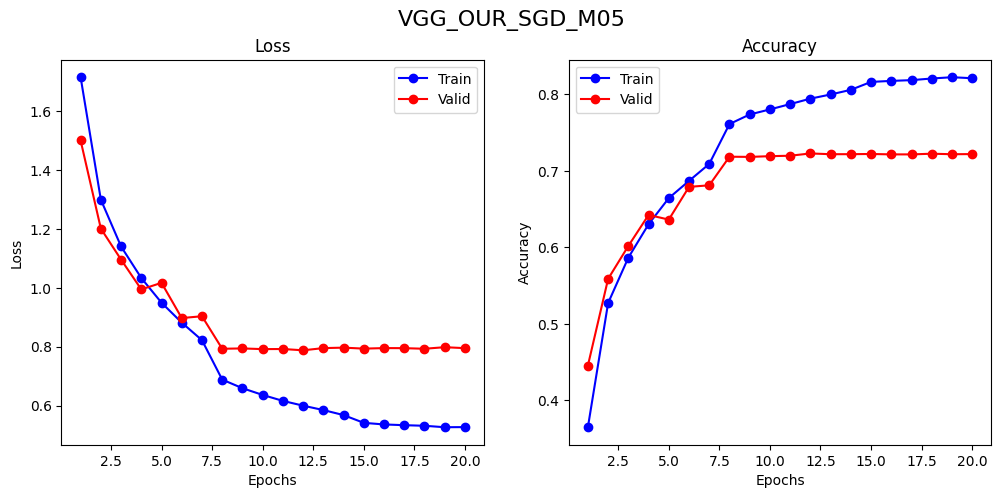

In [82]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [83]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7192

Classification Report:
              precision    recall  f1-score   support

    airplane       0.80      0.82      0.81      9000
  automobile       0.77      0.78      0.78      9000
        bird       0.69      0.67      0.68      9000
         cat       0.60      0.57      0.59      9000
        deer       0.63      0.66      0.64      9000
         dog       0.56      0.56      0.56      9000
        frog       0.79      0.83      0.81      9000
       horse       0.77      0.77      0.77      9000
        ship       0.80      0.78      0.79      9000
       truck       0.77      0.75      0.76      9000

    accuracy                           0.72     90000
   macro avg       0.72      0.72      0.72     90000
weighted avg       0.72      0.72      0.72     90000



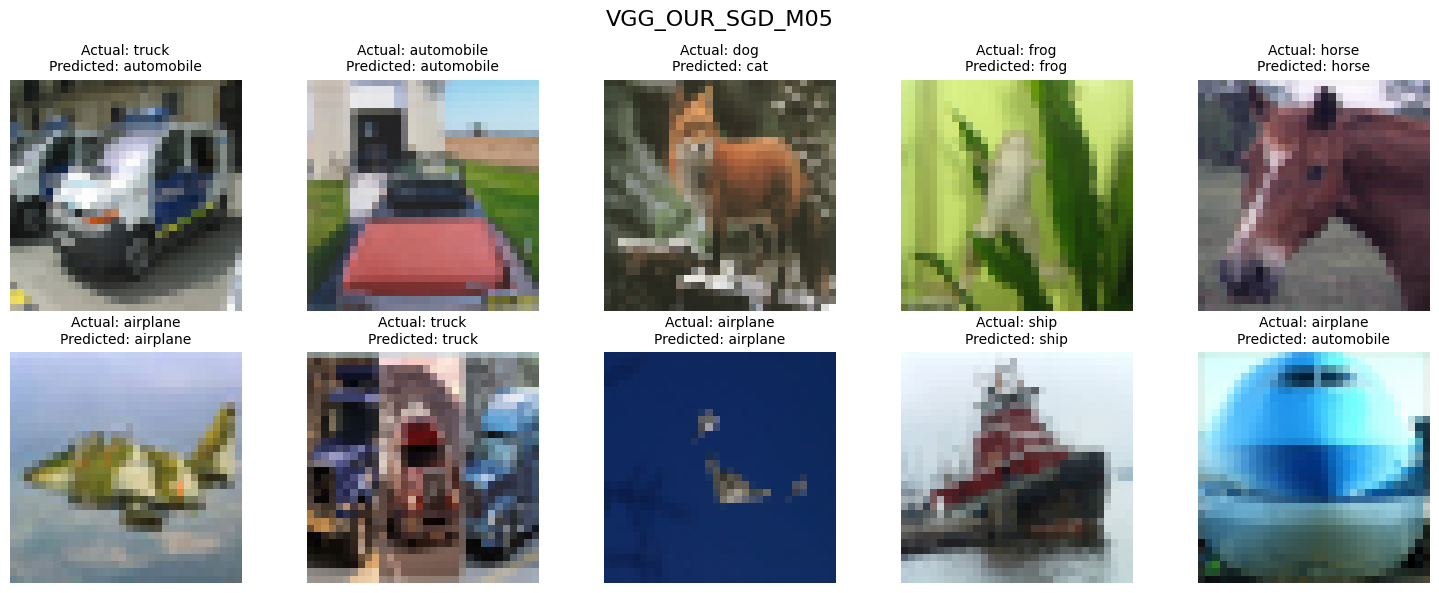

In [84]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG Our SGD 10 epochs


In [85]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [86]:
model = VGG_OUR(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [87]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=10
)

Epoch 0/9
----------
train Loss: 1.4229 Acc: 0.4774
valid Loss: 1.2414 Acc: 0.5567

Epoch 1/9
----------
train Loss: 1.0621 Acc: 0.6198
valid Loss: 0.9592 Acc: 0.6590

Epoch 2/9
----------
train Loss: 0.9226 Acc: 0.6725
valid Loss: 0.8726 Acc: 0.6869

Epoch 3/9
----------
train Loss: 0.8274 Acc: 0.7061
valid Loss: 0.8462 Acc: 0.7007

Epoch 4/9
----------
train Loss: 0.7535 Acc: 0.7347
valid Loss: 0.7892 Acc: 0.7223

Epoch 5/9
----------
train Loss: 0.6934 Acc: 0.7549
valid Loss: 0.7682 Acc: 0.7311

Epoch 6/9
----------
train Loss: 0.6394 Acc: 0.7753
valid Loss: 0.7293 Acc: 0.7442

Epoch 7/9
----------
train Loss: 0.4723 Acc: 0.8374
valid Loss: 0.6552 Acc: 0.7723

Epoch 8/9
----------
train Loss: 0.4307 Acc: 0.8517
valid Loss: 0.6603 Acc: 0.7724

Epoch 9/9
----------
train Loss: 0.3949 Acc: 0.8649
valid Loss: 0.6643 Acc: 0.7735

Training complete in 16m 0s
Best val Acc: 0.773467


In [88]:
title = 'VGG_OUR_SGD_EPOCHS10'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

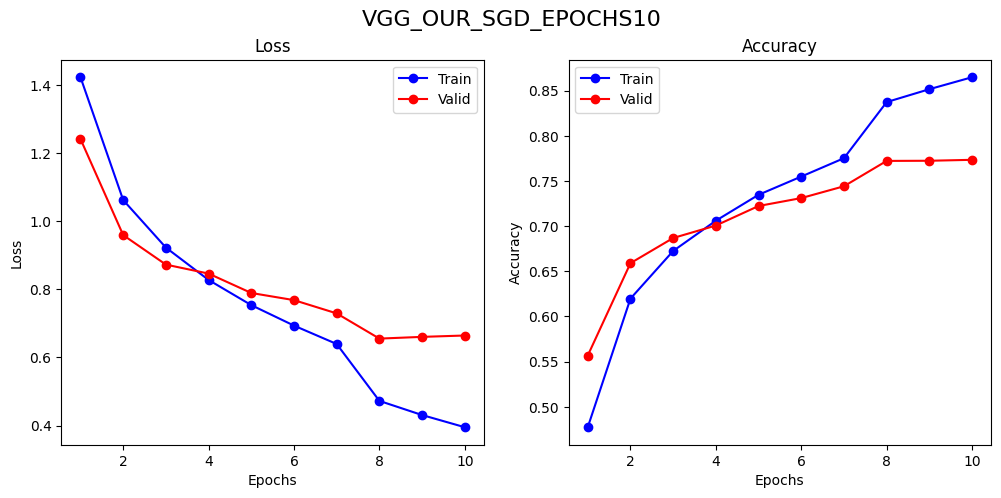

In [89]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [90]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7699

Classification Report:
              precision    recall  f1-score   support

    airplane       0.85      0.85      0.85      9000
  automobile       0.82      0.79      0.80      9000
        bird       0.74      0.75      0.75      9000
         cat       0.66      0.66      0.66      9000
        deer       0.72      0.71      0.71      9000
         dog       0.65      0.60      0.62      9000
        frog       0.83      0.88      0.86      9000
       horse       0.81      0.83      0.82      9000
        ship       0.81      0.85      0.83      9000
       truck       0.79      0.79      0.79      9000

    accuracy                           0.77     90000
   macro avg       0.77      0.77      0.77     90000
weighted avg       0.77      0.77      0.77     90000



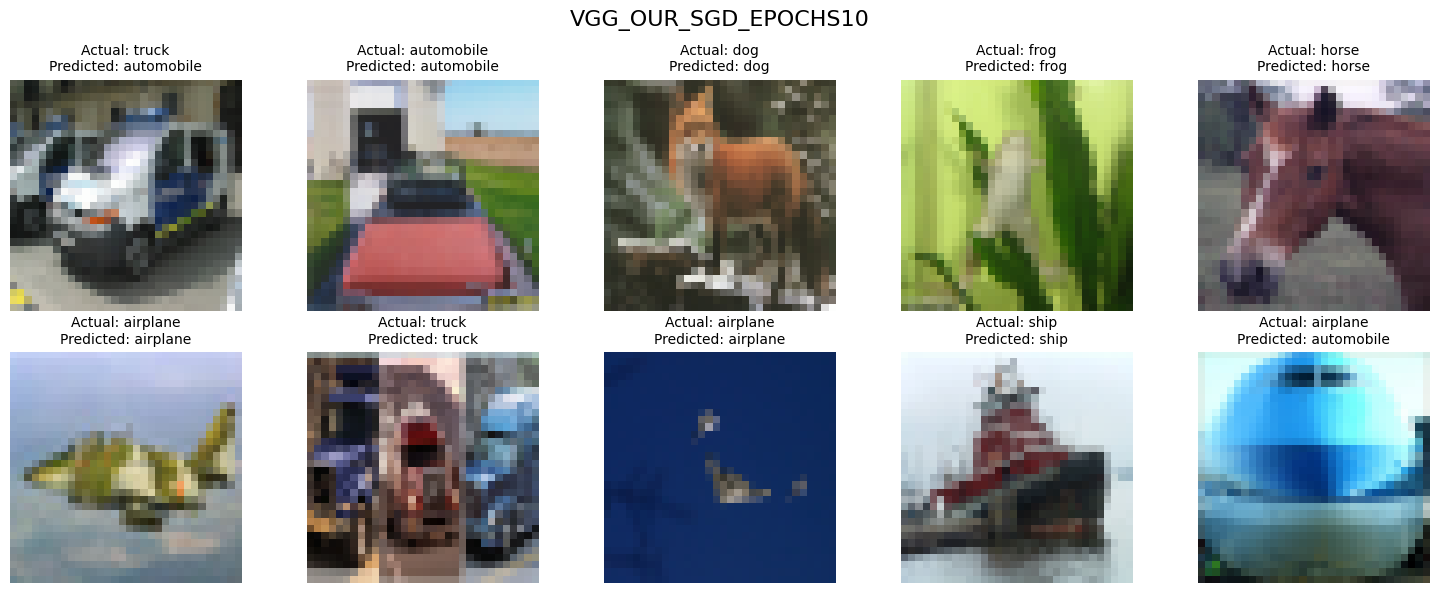

In [91]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG Our SGD 40 epochs


In [92]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [93]:
model = VGG_OUR(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [94]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=40
)

Epoch 0/39
----------
train Loss: 1.4229 Acc: 0.4774
valid Loss: 1.2414 Acc: 0.5567

Epoch 1/39
----------
train Loss: 1.0621 Acc: 0.6198
valid Loss: 0.9592 Acc: 0.6590

Epoch 2/39
----------
train Loss: 0.9226 Acc: 0.6725
valid Loss: 0.8726 Acc: 0.6869

Epoch 3/39
----------
train Loss: 0.8274 Acc: 0.7061
valid Loss: 0.8462 Acc: 0.7007

Epoch 4/39
----------
train Loss: 0.7535 Acc: 0.7347
valid Loss: 0.7892 Acc: 0.7223

Epoch 5/39
----------
train Loss: 0.6934 Acc: 0.7549
valid Loss: 0.7682 Acc: 0.7311

Epoch 6/39
----------
train Loss: 0.6394 Acc: 0.7753
valid Loss: 0.7293 Acc: 0.7442

Epoch 7/39
----------
train Loss: 0.4723 Acc: 0.8374
valid Loss: 0.6552 Acc: 0.7723

Epoch 8/39
----------
train Loss: 0.4307 Acc: 0.8517
valid Loss: 0.6603 Acc: 0.7724

Epoch 9/39
----------
train Loss: 0.3949 Acc: 0.8649
valid Loss: 0.6643 Acc: 0.7735

Epoch 10/39
----------
train Loss: 0.3676 Acc: 0.8738
valid Loss: 0.6700 Acc: 0.7729

Epoch 11/39
----------
train Loss: 0.3450 Acc: 0.8817
valid Loss

In [95]:
title = 'VGG_OUR_SGD_EPOCHS40'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

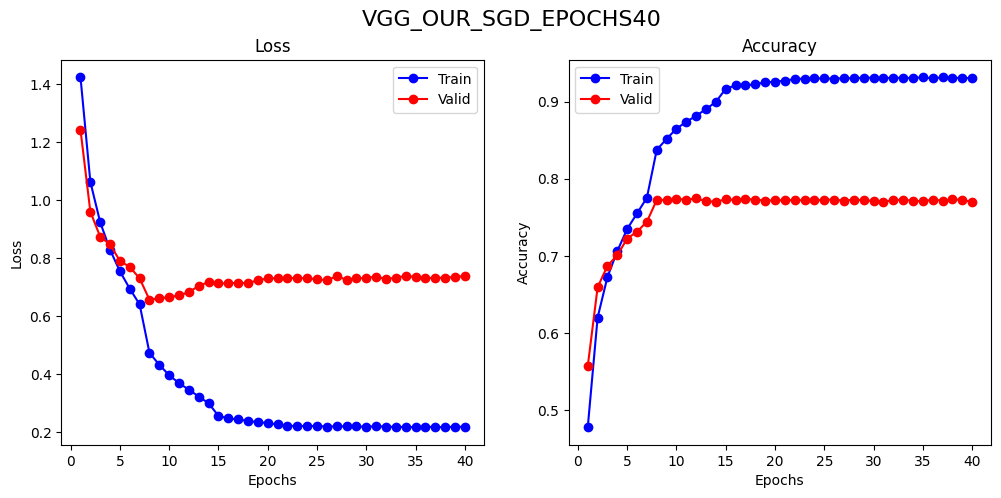

In [96]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [97]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7719

Classification Report:
              precision    recall  f1-score   support

    airplane       0.84      0.85      0.85      9000
  automobile       0.81      0.80      0.80      9000
        bird       0.75      0.76      0.75      9000
         cat       0.65      0.68      0.67      9000
        deer       0.72      0.73      0.72      9000
         dog       0.64      0.60      0.62      9000
        frog       0.86      0.86      0.86      9000
       horse       0.82      0.82      0.82      9000
        ship       0.84      0.82      0.83      9000
       truck       0.79      0.79      0.79      9000

    accuracy                           0.77     90000
   macro avg       0.77      0.77      0.77     90000
weighted avg       0.77      0.77      0.77     90000



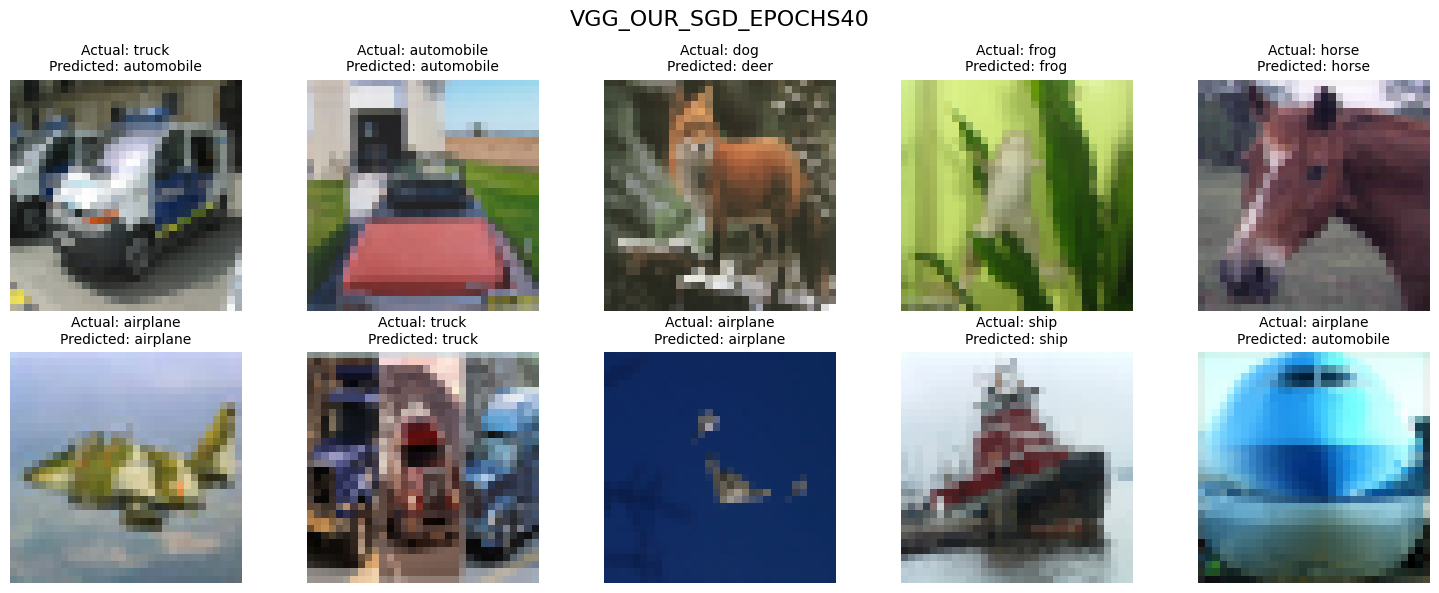

In [98]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

## Augmentation


In [99]:
from torchvision import transforms

In [100]:
cinic_mean = [0.47889522, 0.47227842, 0.43047404]
cinic_std = [0.24205776, 0.23828046, 0.25874835]

### VGG Our SGD Augmentation = None


In [101]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [102]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

data = Data(data_dir, train_transform = transform, test_transform=transform, valid_transform=transform)

In [103]:
model = VGG_OUR(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [104]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.5694 Acc: 0.4188
valid Loss: 2.2350 Acc: 0.3243

Epoch 1/19
----------
train Loss: 1.4499 Acc: 0.4770
valid Loss: 1.6934 Acc: 0.4317

Epoch 2/19
----------
train Loss: 1.4256 Acc: 0.4885
valid Loss: 1.4413 Acc: 0.4816

Epoch 3/19
----------
train Loss: 1.4046 Acc: 0.4963
valid Loss: 1.7554 Acc: 0.3996

Epoch 4/19
----------
train Loss: 1.3961 Acc: 0.5016
valid Loss: 1.4563 Acc: 0.4811

Epoch 5/19
----------
train Loss: 1.3864 Acc: 0.5063
valid Loss: 1.4512 Acc: 0.4754

Epoch 6/19
----------
train Loss: 1.3811 Acc: 0.5076
valid Loss: 1.6597 Acc: 0.3981

Epoch 7/19
----------
train Loss: 1.0876 Acc: 0.6216
valid Loss: 0.9669 Acc: 0.6602

Epoch 8/19
----------
train Loss: 0.9993 Acc: 0.6554
valid Loss: 1.0374 Acc: 0.6355

Epoch 9/19
----------
train Loss: 0.9579 Acc: 0.6716
valid Loss: 0.9513 Acc: 0.6655

Epoch 10/19
----------
train Loss: 0.9183 Acc: 0.6852
valid Loss: 0.9247 Acc: 0.6771

Epoch 11/19
----------
train Loss: 0.8822 Acc: 0.6989
valid Loss

In [105]:
title = 'VGG_OUR_SGD_AUG_NONE'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

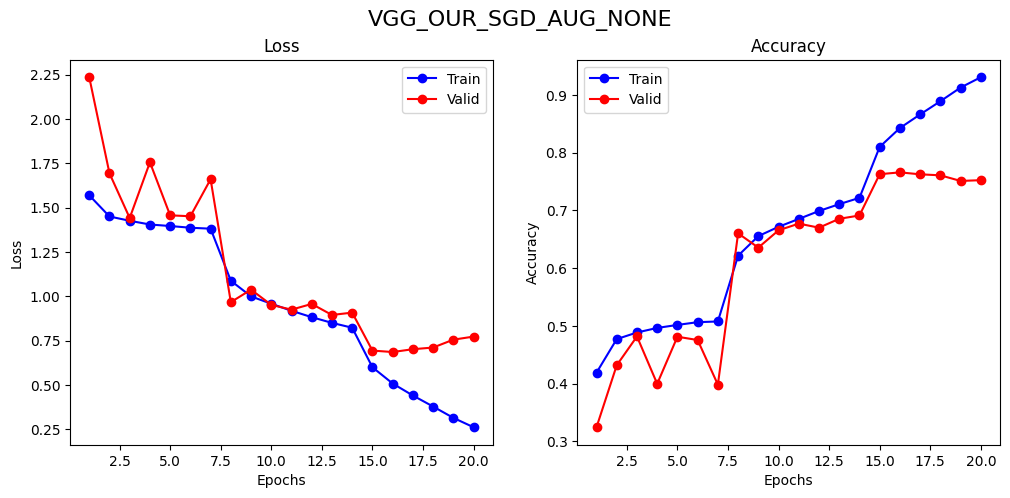

In [106]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [107]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7620

Classification Report:
              precision    recall  f1-score   support

    airplane       0.87      0.82      0.85      9000
  automobile       0.79      0.83      0.81      9000
        bird       0.72      0.75      0.73      9000
         cat       0.68      0.60      0.64      9000
        deer       0.68      0.73      0.71      9000
         dog       0.59      0.64      0.61      9000
        frog       0.87      0.83      0.85      9000
       horse       0.83      0.80      0.82      9000
        ship       0.80      0.86      0.83      9000
       truck       0.82      0.75      0.78      9000

    accuracy                           0.76     90000
   macro avg       0.76      0.76      0.76     90000
weighted avg       0.76      0.76      0.76     90000



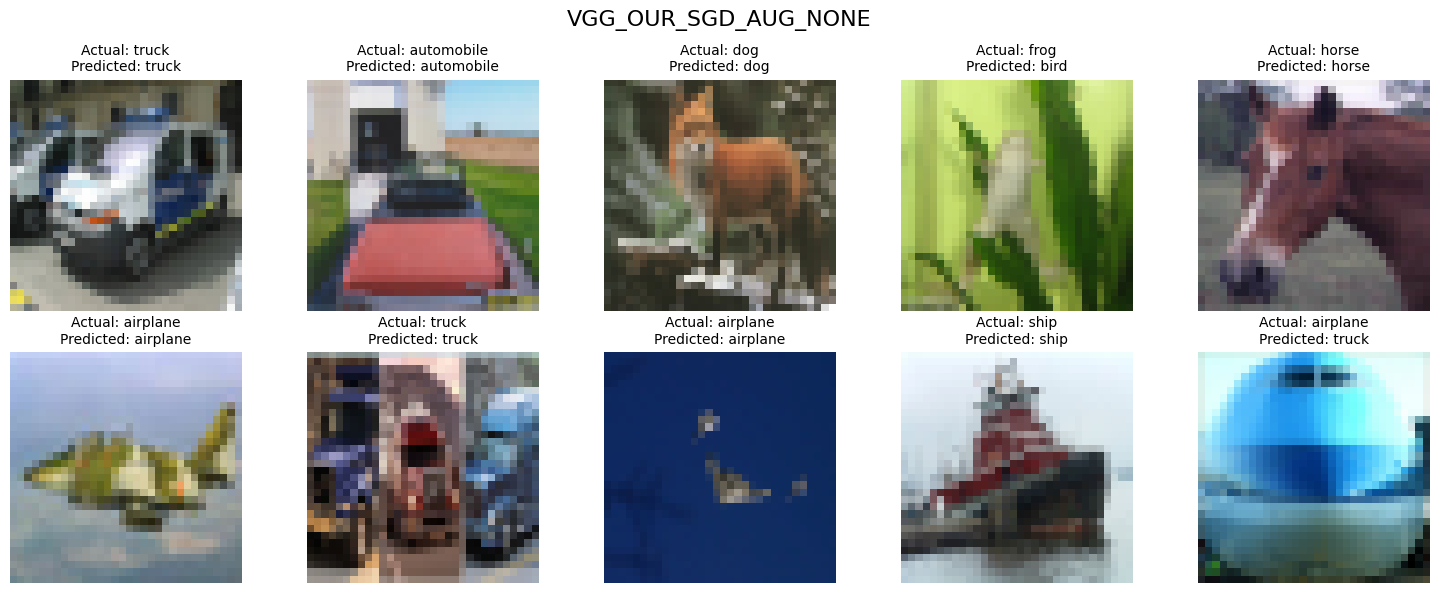

In [108]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG Our SGD Augmentation = ColorJitter


In [109]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [110]:
train_transform = transforms.Compose([
    transforms.ColorJitter(brightness=0.2, contrast=0.2), 
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

data = Data(data_dir, train_transform = train_transform, test_transform=transform, valid_transform=transform)

In [111]:
model = VGG_OUR(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [112]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.5902 Acc: 0.4069
valid Loss: 1.6741 Acc: 0.4101

Epoch 1/19
----------
train Loss: 1.4598 Acc: 0.4724
valid Loss: 1.5621 Acc: 0.4500

Epoch 2/19
----------
train Loss: 1.4327 Acc: 0.4863
valid Loss: 1.8248 Acc: 0.3540

Epoch 3/19
----------
train Loss: 1.4150 Acc: 0.4947
valid Loss: 1.4318 Acc: 0.4884

Epoch 4/19
----------
train Loss: 1.4060 Acc: 0.4966
valid Loss: 1.5922 Acc: 0.4343

Epoch 5/19
----------
train Loss: 1.3982 Acc: 0.5019
valid Loss: 1.4977 Acc: 0.4649

Epoch 6/19
----------
train Loss: 1.3954 Acc: 0.5022
valid Loss: 1.4903 Acc: 0.4534

Epoch 7/19
----------
train Loss: 1.0989 Acc: 0.6179
valid Loss: 0.9869 Acc: 0.6488

Epoch 8/19
----------
train Loss: 1.0112 Acc: 0.6509
valid Loss: 1.0350 Acc: 0.6385

Epoch 9/19
----------
train Loss: 0.9724 Acc: 0.6665
valid Loss: 0.9379 Acc: 0.6707

Epoch 10/19
----------
train Loss: 0.9332 Acc: 0.6806
valid Loss: 0.9995 Acc: 0.6535

Epoch 11/19
----------
train Loss: 0.9002 Acc: 0.6940
valid Loss

In [113]:
title = 'VGG_OUR_SGD_AUG_ColorJitter'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

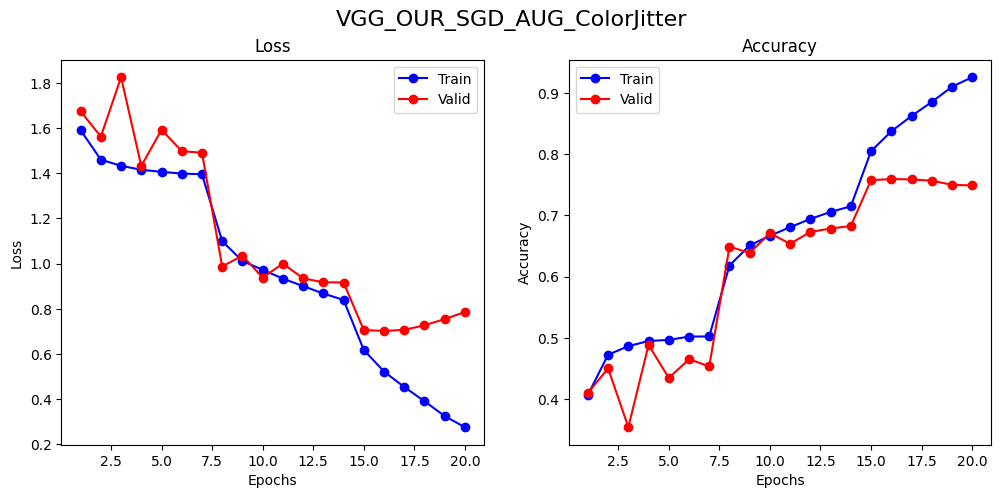

In [114]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [115]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7572

Classification Report:
              precision    recall  f1-score   support

    airplane       0.85      0.85      0.85      9000
  automobile       0.81      0.81      0.81      9000
        bird       0.71      0.73      0.72      9000
         cat       0.67      0.61      0.64      9000
        deer       0.67      0.73      0.70      9000
         dog       0.58      0.64      0.61      9000
        frog       0.87      0.80      0.84      9000
       horse       0.84      0.79      0.81      9000
        ship       0.82      0.83      0.82      9000
       truck       0.80      0.77      0.79      9000

    accuracy                           0.76     90000
   macro avg       0.76      0.76      0.76     90000
weighted avg       0.76      0.76      0.76     90000



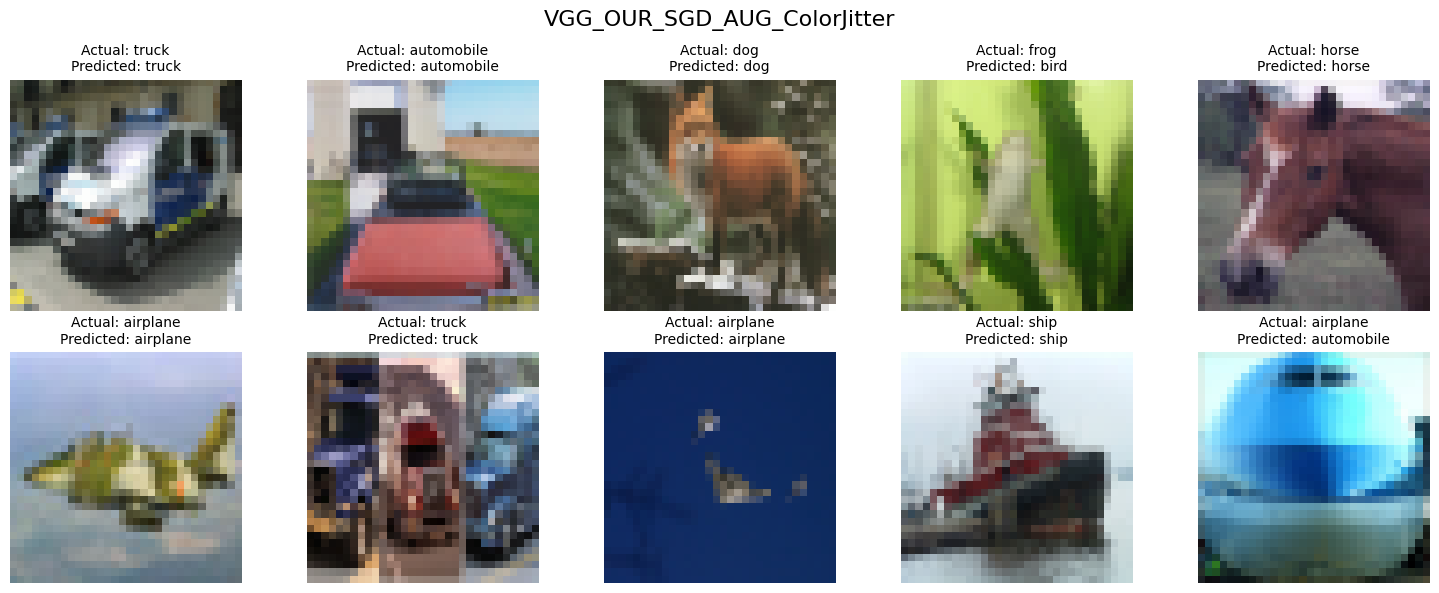

In [116]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG Our SGD Augmentation = Gray Scale + GaussianBlur


In [117]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [118]:
train_transform = transforms.Compose([
    transforms.RandomGrayscale(p=0.1),
    transforms.GaussianBlur(kernel_size=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

data = Data(data_dir, train_transform = train_transform, test_transform=transform, valid_transform=transform)

In [119]:
model = VGG_OUR(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [120]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.6833 Acc: 0.3762
valid Loss: 1.5819 Acc: 0.4199

Epoch 1/19
----------
train Loss: 1.5722 Acc: 0.4291
valid Loss: 1.6383 Acc: 0.4136

Epoch 2/19
----------
train Loss: 1.5517 Acc: 0.4397
valid Loss: 1.5572 Acc: 0.4385

Epoch 3/19
----------
train Loss: 1.5420 Acc: 0.4437
valid Loss: 1.5975 Acc: 0.4324

Epoch 4/19
----------
train Loss: 1.5333 Acc: 0.4459
valid Loss: 1.7218 Acc: 0.3868

Epoch 5/19
----------
train Loss: 1.5333 Acc: 0.4446
valid Loss: 1.4698 Acc: 0.4670

Epoch 6/19
----------
train Loss: 1.5336 Acc: 0.4447
valid Loss: 1.6557 Acc: 0.4105

Epoch 7/19
----------
train Loss: 1.2805 Acc: 0.5447
valid Loss: 1.1783 Acc: 0.5785

Epoch 8/19
----------
train Loss: 1.2025 Acc: 0.5780
valid Loss: 1.1241 Acc: 0.5993

Epoch 9/19
----------
train Loss: 1.1634 Acc: 0.5924
valid Loss: 1.1233 Acc: 0.5995

Epoch 10/19
----------
train Loss: 1.1163 Acc: 0.6121
valid Loss: 1.0648 Acc: 0.6264

Epoch 11/19
----------
train Loss: 1.0802 Acc: 0.6269
valid Loss

In [121]:
title = 'VGG_OUR_SGD_AUG_Grayscale_Blur'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

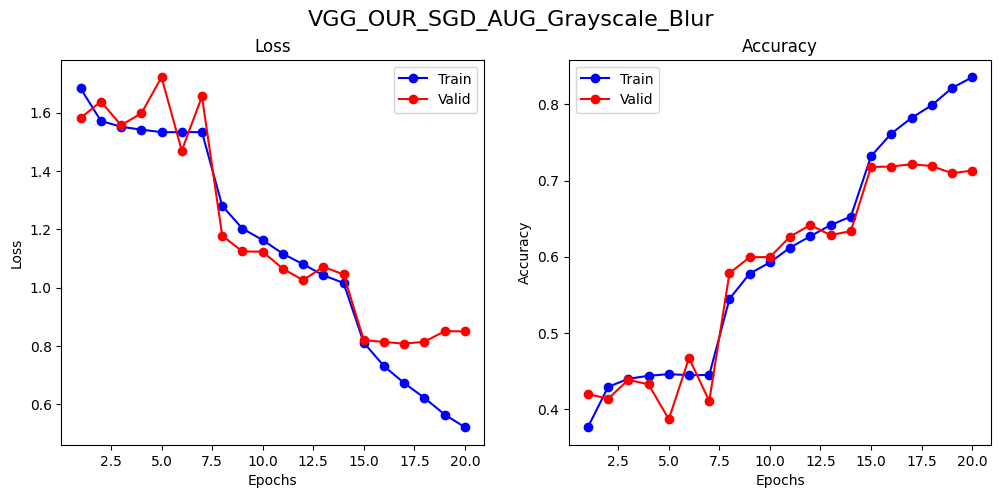

In [122]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [123]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7186

Classification Report:
              precision    recall  f1-score   support

    airplane       0.80      0.83      0.81      9000
  automobile       0.77      0.79      0.78      9000
        bird       0.65      0.71      0.68      9000
         cat       0.58      0.57      0.57      9000
        deer       0.67      0.63      0.65      9000
         dog       0.60      0.50      0.54      9000
        frog       0.74      0.85      0.80      9000
       horse       0.78      0.78      0.78      9000
        ship       0.79      0.80      0.79      9000
       truck       0.77      0.74      0.75      9000

    accuracy                           0.72     90000
   macro avg       0.72      0.72      0.72     90000
weighted avg       0.72      0.72      0.72     90000



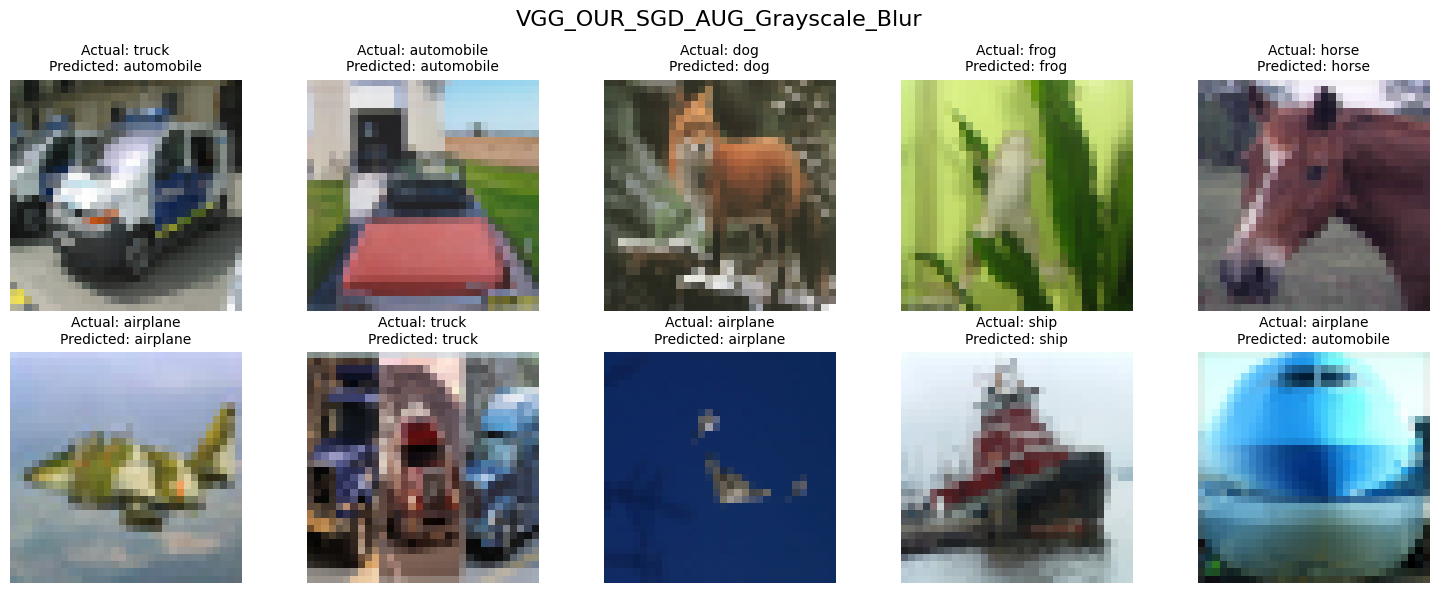

In [124]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### VGG Our SGD Augmentation = RandomHorizontalFlip + RandomCrop


In [125]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [126]:
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(32, padding=4), 
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

data = Data(data_dir, train_transform = train_transform, test_transform=transform, valid_transform=transform)

In [127]:
model = VGG_OUR(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [128]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.6574 Acc: 0.3793
valid Loss: 2.0814 Acc: 0.3539

Epoch 1/19
----------
train Loss: 1.5274 Acc: 0.4452
valid Loss: 2.2193 Acc: 0.3301

Epoch 2/19
----------
train Loss: 1.5031 Acc: 0.4576
valid Loss: 1.7161 Acc: 0.3903

Epoch 3/19
----------
train Loss: 1.4923 Acc: 0.4625
valid Loss: 1.6318 Acc: 0.4164

Epoch 4/19
----------
train Loss: 1.4834 Acc: 0.4653
valid Loss: 1.5565 Acc: 0.4336

Epoch 5/19
----------
train Loss: 1.4803 Acc: 0.4683
valid Loss: 1.6047 Acc: 0.4283

Epoch 6/19
----------
train Loss: 1.4703 Acc: 0.4700
valid Loss: 2.0109 Acc: 0.3269

Epoch 7/19
----------
train Loss: 1.1981 Acc: 0.5765
valid Loss: 1.0568 Acc: 0.6194

Epoch 8/19
----------
train Loss: 1.1212 Acc: 0.6070
valid Loss: 1.0897 Acc: 0.6168

Epoch 9/19
----------
train Loss: 1.0863 Acc: 0.6228
valid Loss: 1.0089 Acc: 0.6435

Epoch 10/19
----------
train Loss: 1.0481 Acc: 0.6382
valid Loss: 1.1007 Acc: 0.6152

Epoch 11/19
----------
train Loss: 1.0178 Acc: 0.6519
valid Loss

In [129]:
title = 'VGG_OUR_SGD_AUG_HorizontalFlip_Crop'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

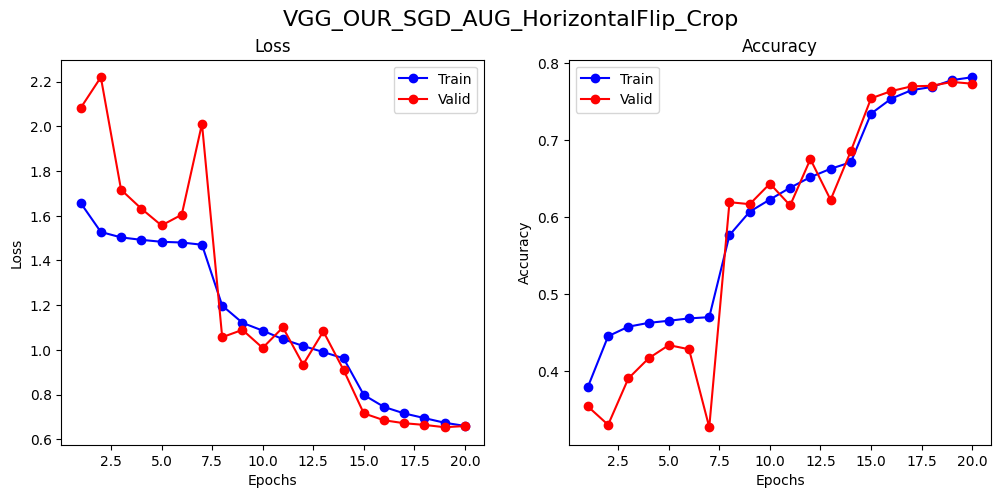

In [130]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [131]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7716

Classification Report:
              precision    recall  f1-score   support

    airplane       0.88      0.83      0.85      9000
  automobile       0.81      0.80      0.80      9000
        bird       0.75      0.75      0.75      9000
         cat       0.67      0.68      0.67      9000
        deer       0.69      0.75      0.72      9000
         dog       0.63      0.61      0.62      9000
        frog       0.86      0.85      0.86      9000
       horse       0.86      0.78      0.82      9000
        ship       0.80      0.86      0.83      9000
       truck       0.79      0.81      0.80      9000

    accuracy                           0.77     90000
   macro avg       0.77      0.77      0.77     90000
weighted avg       0.77      0.77      0.77     90000



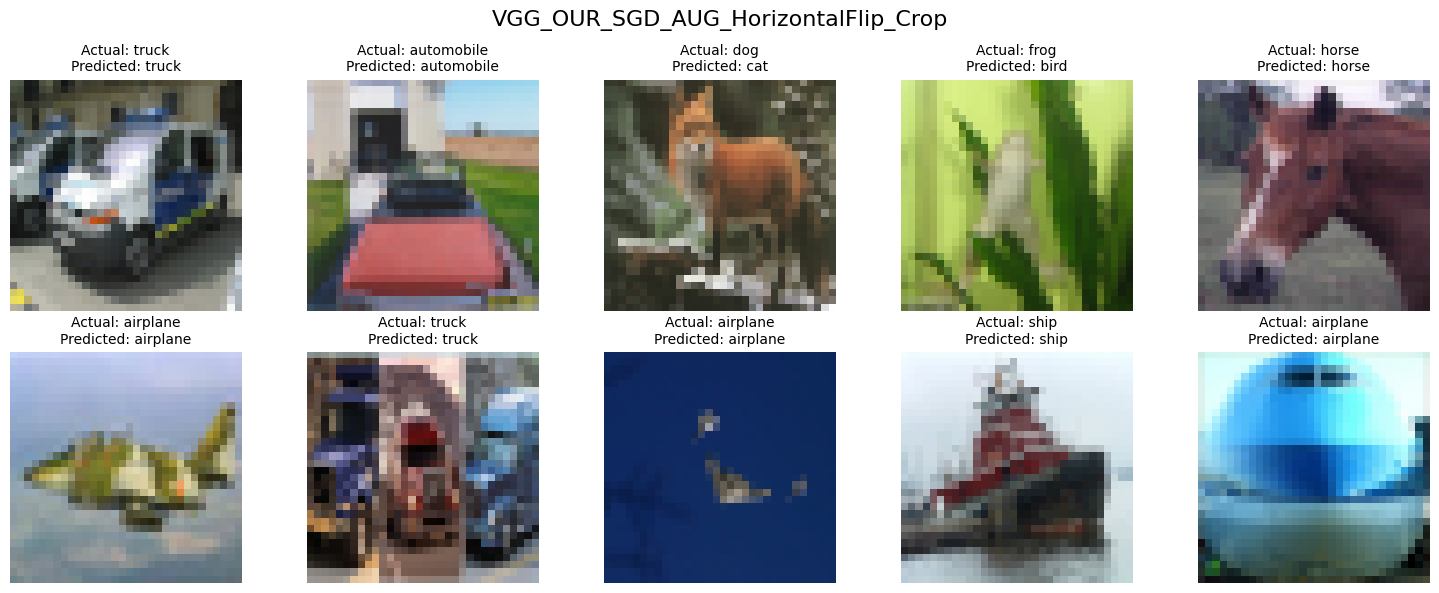

In [132]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### Advanced - VGG Our SGD Augmentation = Auto Augment


In [133]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [134]:
from torchvision.transforms import autoaugment

train_transform = transforms.Compose([
    autoaugment.AutoAugment(
        policy=autoaugment.AutoAugmentPolicy.CIFAR10,
        interpolation=transforms.InterpolationMode.BILINEAR,
    ),
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

data = Data(data_dir, train_transform = train_transform, test_transform=transform, valid_transform=transform)

In [135]:
model = VGG_OUR(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [136]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.7966 Acc: 0.3251
valid Loss: 1.7897 Acc: 0.3597

Epoch 1/19
----------
train Loss: 1.6861 Acc: 0.3748
valid Loss: 1.6326 Acc: 0.3941

Epoch 2/19
----------
train Loss: 1.6468 Acc: 0.3982
valid Loss: 1.5571 Acc: 0.4327

Epoch 3/19
----------
train Loss: 1.6342 Acc: 0.4087
valid Loss: 1.6271 Acc: 0.3885

Epoch 4/19
----------
train Loss: 1.6282 Acc: 0.4095
valid Loss: 1.5160 Acc: 0.4454

Epoch 5/19
----------
train Loss: 1.6165 Acc: 0.4161
valid Loss: 1.7469 Acc: 0.3828

Epoch 6/19
----------
train Loss: 1.6166 Acc: 0.4132
valid Loss: 1.7083 Acc: 0.3595

Epoch 7/19
----------
train Loss: 1.3519 Acc: 0.5169
valid Loss: 1.0984 Acc: 0.6084

Epoch 8/19
----------
train Loss: 1.2682 Acc: 0.5522
valid Loss: 1.0913 Acc: 0.6068

Epoch 9/19
----------
train Loss: 1.2315 Acc: 0.5671
valid Loss: 1.0863 Acc: 0.6120

Epoch 10/19
----------
train Loss: 1.1989 Acc: 0.5803
valid Loss: 0.9867 Acc: 0.6574

Epoch 11/19
----------
train Loss: 1.1685 Acc: 0.5947
valid Loss

In [137]:
title = 'VGG_OUR_SGD_AUG_AUTO'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

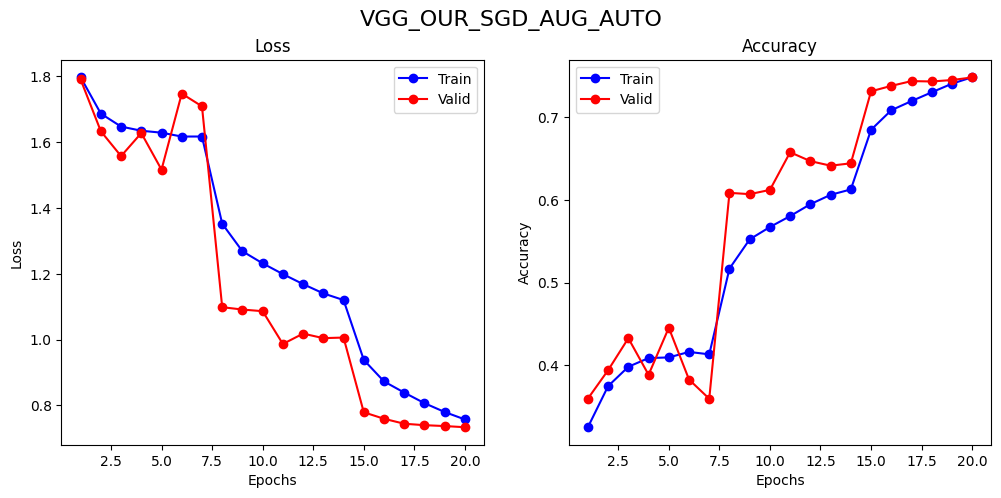

In [138]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [139]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7433

Classification Report:
              precision    recall  f1-score   support

    airplane       0.85      0.83      0.84      9000
  automobile       0.86      0.74      0.80      9000
        bird       0.72      0.69      0.70      9000
         cat       0.59      0.65      0.62      9000
        deer       0.63      0.73      0.68      9000
         dog       0.61      0.54      0.57      9000
        frog       0.85      0.80      0.82      9000
       horse       0.82      0.79      0.80      9000
        ship       0.80      0.84      0.82      9000
       truck       0.74      0.82      0.78      9000

    accuracy                           0.74     90000
   macro avg       0.75      0.74      0.74     90000
weighted avg       0.75      0.74      0.74     90000



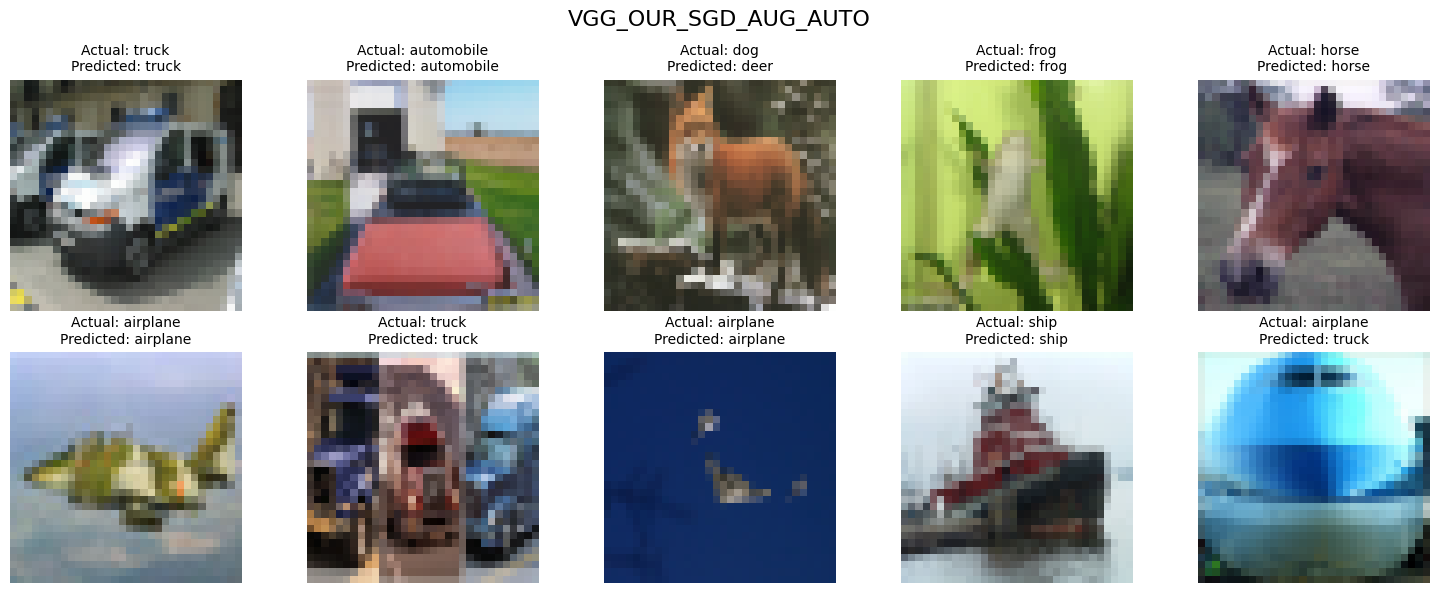

In [140]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)

### Advanced - VGG Our SGD Augmentation = Auto Augment 40 Epochs


In [141]:
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [142]:
from torchvision.transforms import autoaugment

train_transform = transforms.Compose([
    autoaugment.AutoAugment(
        policy=autoaugment.AutoAugmentPolicy.CIFAR10,
        interpolation=transforms.InterpolationMode.BILINEAR,
    ),
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

data = Data(data_dir, train_transform = train_transform, test_transform=transform, valid_transform=transform)

In [143]:
model = VGG_OUR(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [144]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=40
)

Epoch 0/39
----------
train Loss: 1.7966 Acc: 0.3251
valid Loss: 1.7897 Acc: 0.3597

Epoch 1/39
----------
train Loss: 1.6861 Acc: 0.3748
valid Loss: 1.6326 Acc: 0.3941

Epoch 2/39
----------
train Loss: 1.6468 Acc: 0.3982
valid Loss: 1.5571 Acc: 0.4327

Epoch 3/39
----------
train Loss: 1.6342 Acc: 0.4087
valid Loss: 1.6271 Acc: 0.3885

Epoch 4/39
----------
train Loss: 1.6282 Acc: 0.4095
valid Loss: 1.5160 Acc: 0.4454

Epoch 5/39
----------
train Loss: 1.6165 Acc: 0.4161
valid Loss: 1.7469 Acc: 0.3828

Epoch 6/39
----------
train Loss: 1.6166 Acc: 0.4132
valid Loss: 1.7083 Acc: 0.3595

Epoch 7/39
----------
train Loss: 1.3519 Acc: 0.5169
valid Loss: 1.0984 Acc: 0.6084

Epoch 8/39
----------
train Loss: 1.2682 Acc: 0.5522
valid Loss: 1.0913 Acc: 0.6068

Epoch 9/39
----------
train Loss: 1.2315 Acc: 0.5671
valid Loss: 1.0863 Acc: 0.6120

Epoch 10/39
----------
train Loss: 1.1989 Acc: 0.5803
valid Loss: 0.9867 Acc: 0.6574

Epoch 11/39
----------
train Loss: 1.1685 Acc: 0.5947
valid Loss

In [145]:
title = 'VGG_OUR_SGD_AUG_AUTO_EPOCHS40'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

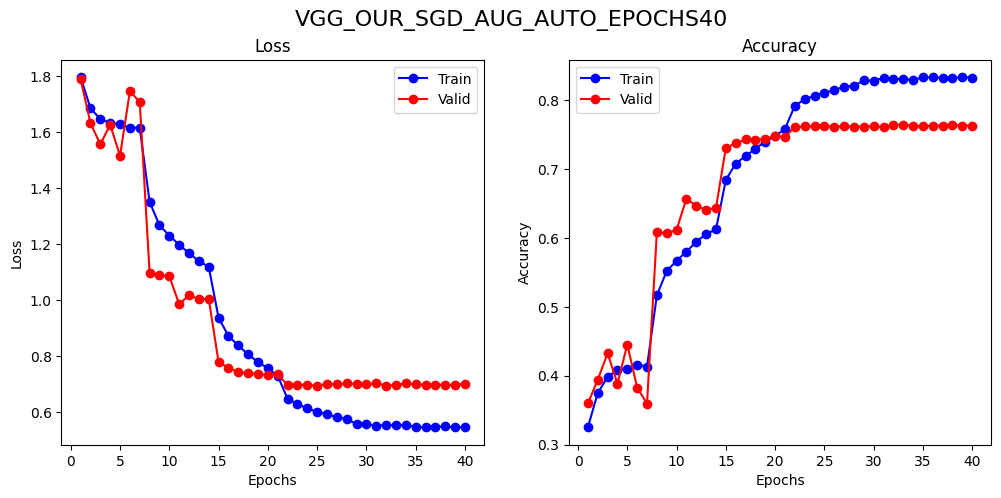

In [146]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [147]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7603

Classification Report:
              precision    recall  f1-score   support

    airplane       0.85      0.86      0.85      9000
  automobile       0.82      0.80      0.81      9000
        bird       0.74      0.71      0.73      9000
         cat       0.63      0.64      0.64      9000
        deer       0.69      0.71      0.70      9000
         dog       0.62      0.58      0.60      9000
        frog       0.83      0.85      0.84      9000
       horse       0.83      0.81      0.82      9000
        ship       0.82      0.84      0.83      9000
       truck       0.78      0.80      0.79      9000

    accuracy                           0.76     90000
   macro avg       0.76      0.76      0.76     90000
weighted avg       0.76      0.76      0.76     90000



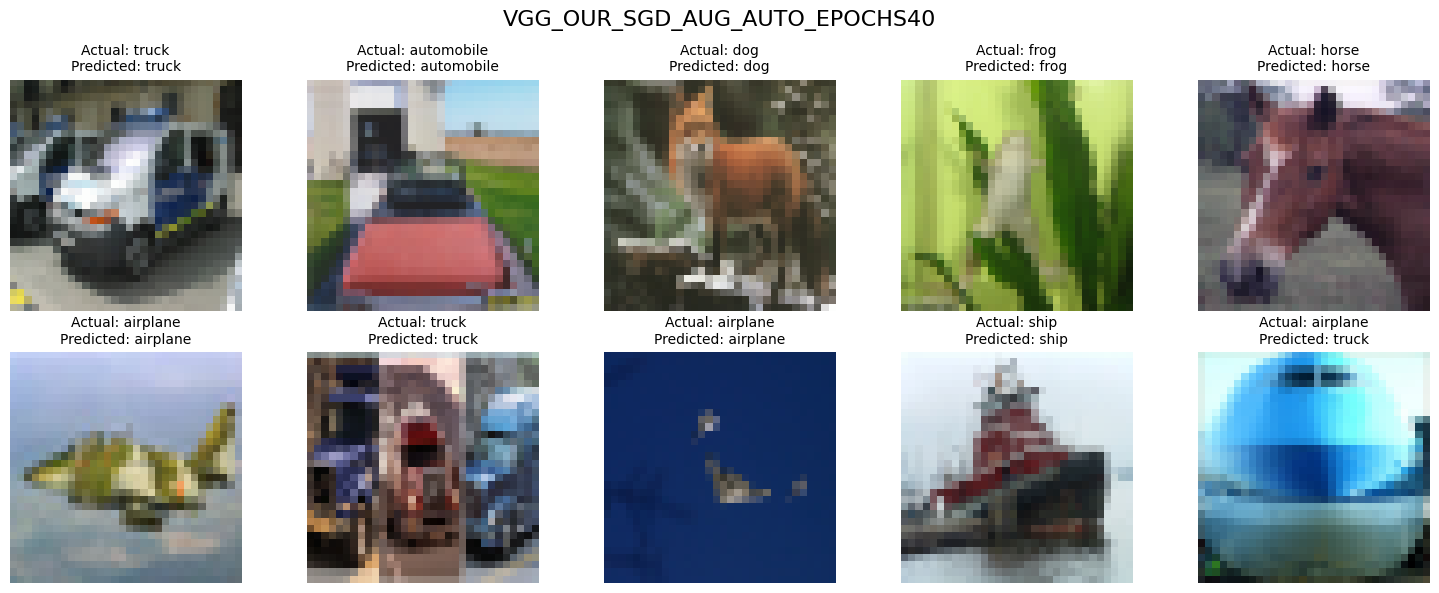

In [148]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)